# LAB04: Regresion y agrupamientov2
##### Grupo: B05

Si estamos utilizando google colab, en vez de clonar el repositorio, con wget obtenemos el archivo que contiene el dataset

In [478]:
import os

filename = 'wine_alcohol.csv'
url = 'https://github.com/Alf-caput/LAB04_Regresion_y_agrupamiento/raw/main/wine_alcohol.csv'

if not os.path.exists(filename):
    os.system('wget' + ' ' + url)

Junto con las librerías requeridas

In [479]:
import os

requirements = 'requirements.txt'
url = 'https://github.com/Alf-caput/LAB04_Regresion_y_agrupamiento/raw/main/requirements.txt'

if not os.path.exists(requirements):
    os.system('wget' + ' ' + url)

os.system('pip install -r requirements.txt')

0

### Ejercicio 1: Regresión lineal simple

Una prestigiosa empresa productora de vinos quiere construir un modelo de regresión que le permita predecir
el porcentaje de alcohol de un vino en base a ciertas características (acidez, azúcar residual, azufre, cloruros,
densidad, tipo de vino, sulfatos y pH).
Para ello han construido un dataset, denominado wine_alcohol.csv, que contiene la información de todos los
vinos que han sido producidos en los últimos años con el objetivo de construir un modelo y realizar las
siguientes acciones:


1.    Realizar todo el proceso de preparación, limpieza y análisis de los datos con el objetivo de identificar
aquellas variables candidatas para el proceso de regresión (0.5 puntos).
2.   Realizar un análisis sobre los atributos del dataset con el objetivo de entender las posibles relaciones
que existen entre ellas y a continuación elige los dos atributos que mayor relación guardan con el
atributo objetivo (nivel de alcohol) (1 punto). En necesario justificar la elección de los atributos
mediante la utilización de datos empíricos.
3. Construir un modelo de regresión lineal mediante un proceso analítico para una de las variables
seleccionadas en el punto anterior (1 punto).
4. Calcular el error en el modelo obtenidos en el punto anterior (0.5 puntos).




#### 1- Realizar todo el proceso de preparación, limpieza y análisis de los datos con el objetivo de identificar aquellas variables candidatas para el proceso de regresión (0.5 puntos). 

Importamos las librerias correspondientes y leemos el archivo csv.

In [480]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

In [481]:
filename = 'wine_alcohol.csv'
df = pd.read_csv(filename, sep=';')

df.head()

id  fixed acidity  volatile acidity  citric acid  residual sugar  \
0   0            7.4              0.70         0.00             1.9   
1   1            7.8              0.88         0.00             2.6   
2   2            7.8              0.76         0.04             2.3   
3   3           11.2              0.28         0.56             1.9   
4   4            7.4              0.70         0.00             1.9   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.076                 11.0                  34.0   0.9978  3.51   
1      0.098                 25.0                  67.0   0.9968  3.20   
2      0.092                 15.0                  54.0   0.9970  3.26   
3      0.075                 17.0                  60.0   0.9980  3.16   
4      0.076                 11.0                  34.0   0.9978  3.51   

   sulphates  quality  wine type  alcohol  
0       0.56        5          1      9.4  
1       0.68        5          1      9.8  
2       0.65        5          1      9.8  
3       0.58        6          1      9.8  
4       0.56        5          1      9.4

Nos fijamos que los valores de la columna index se corresponden con el índice de fila que nos genera pandas.   

In [482]:
len(df.index.unique()) == len(df['id'])

True

Por tanto, podemos usar esa columna como índice

In [483]:
df = df.set_index('id')
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
id                                                                            
0             7.4              0.70         0.00             1.9      0.076   
1             7.8              0.88         0.00             2.6      0.098   
2             7.8              0.76         0.04             2.3      0.092   
3            11.2              0.28         0.56             1.9      0.075   
4             7.4              0.70         0.00             1.9      0.076   

    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
id                                                                        
0                  11.0                  34.0   0.9978  3.51       0.56   
1                  25.0                  67.0   0.9968  3.20       0.68   
2                  15.0                  54.0   0.9970  3.26       0.65   
3                  17.0                  60.0   0.9980  3.16       0.58   
4                  11.0                  34.0   0.9978  3.51       0.56   

    quality  wine type  alcohol  
id                               
0         5          1      9.4  
1         5          1      9.8  
2         5          1      9.8  
3         6          1      9.8  
4         5          1      9.4

Con el método info podemos ver los tipos de las variables:

In [484]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  quality               6497 non-null   int64  
 11  wine type             6497 non-null   int64  
 12  alcohol               6497 non-null   float64
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


Todas parecen ser de tipo numérico, no obstante como veremos más adelante las variables **quality** y **wine type** toman valores numéricos discretos que realmente hacen referencia a categorías.

Podemos también comprobar la existencia de valores NA en el dataset:

In [485]:
print(f'Número total de NA en el dataframe: {(col_na:=df.isna().sum()).sum()}')
pd.DataFrame({'Valores NA': col_na})

Número total de NA en el dataframe: 0


Valores NA
fixed acidity                  0
volatile acidity               0
citric acid                    0
residual sugar                 0
chlorides                      0
free sulfur dioxide            0
total sulfur dioxide           0
density                        0
pH                             0
sulphates                      0
quality                        0
wine type                      0
alcohol                        0

No se encuentra ninguno, en caso contrario habría sido necesario tomar una decisión sobre eliminar esas observaciones o sustituir el valor NA por algún valor que sea coherente con los datos como por ejemplo la media.

Con el método describe podemos hacernos una idea de los rangos en los que se mueven las variables:

In [486]:
# Only check partial info and use .T for clearer appearance
significant_info = ['mean', 'std', 'min', 'max']
df.describe().T.loc[:, significant_info]

mean        std      min        max
fixed acidity           7.215307   1.296434  3.80000   15.90000
volatile acidity        0.339666   0.164636  0.08000    1.58000
citric acid             0.318633   0.145318  0.00000    1.66000
residual sugar          5.443235   4.757804  0.60000   65.80000
chlorides               0.056034   0.035034  0.00900    0.61100
free sulfur dioxide    30.525319  17.749400  1.00000  289.00000
total sulfur dioxide  115.744574  56.521855  6.00000  440.00000
density                 0.994697   0.002999  0.98711    1.03898
pH                      3.218501   0.160787  2.72000    4.01000
sulphates               0.531268   0.148806  0.22000    2.00000
quality                 5.818378   0.873255  3.00000    9.00000
wine type               1.753886   0.430779  1.00000    2.00000
alcohol                10.491801   1.192712  8.00000   14.90000

Finalmente con boxplots podemos comprobar a simple vista que existen outliers en distintas variables, más adelante tomamos decisiones sobre los mismos

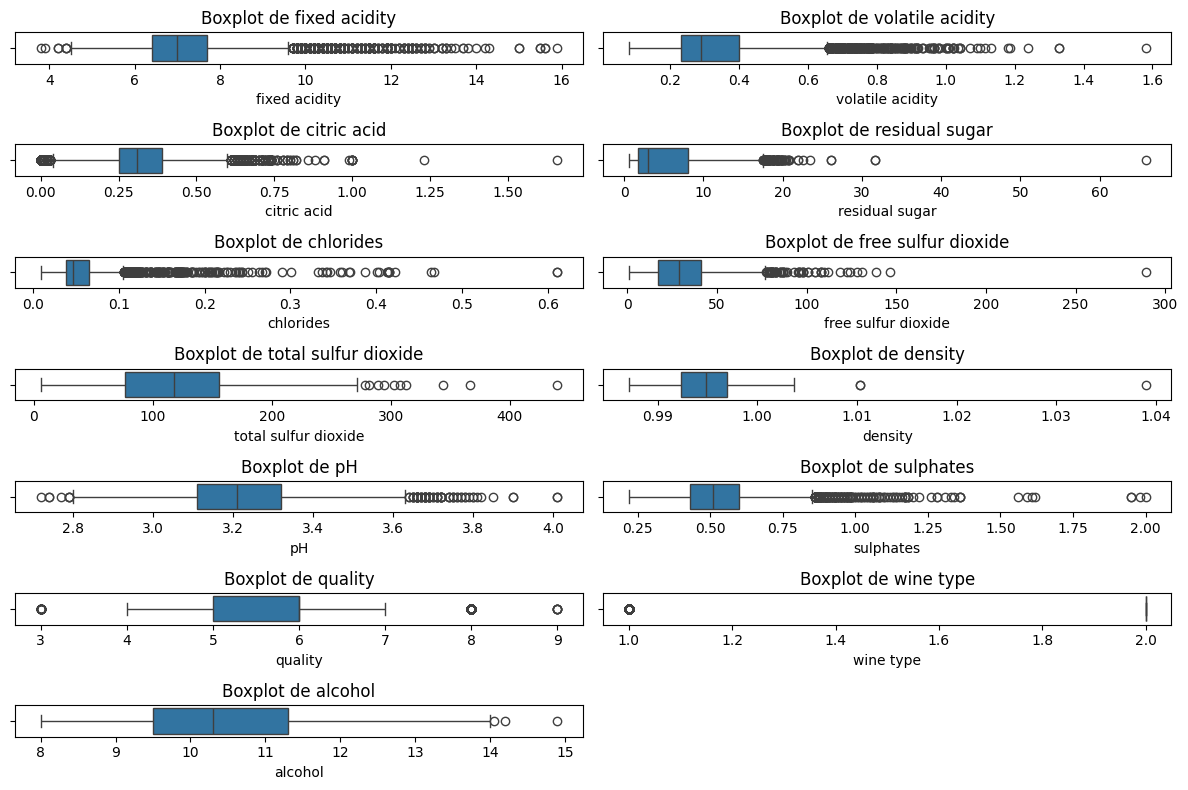

In [487]:
# Seleccionamos las columnas numéricas para el análisis de outliers
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Creamos gráficos de boxplot para cada característica numérica
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_features):
    plt.subplot((len(numeric_features) + 1) // 2, 2, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

El dataset cuenta con las siguientes variables:  

- fixed acidity
- volatile acidity
- citric acid
- residual sugar
- chlorides
- free sulfur dioxide
- total sulfur dioxide
- density
- pH
- sulphates
- quality
- winetype
- alcohol

Sería de interés eliminar o sustituir (por otros coherentes) valores que no tengan sentido.

Como no somos expertos en el campo, vamos a estudiar un subconjunto de las variables para la limpieza del dataset, y posteriormente decidiremos la forma de eliminar outliers sobre el conjunto completo de variables.

Subconjunto sobre el que se hace limpieza:
- citric acid
- pH
- quality
- winetype
- alcohol

Aunque **fixed acidity** y **volatile acidity** son valores importantes no somos expertos y se definen a partir de la combinación de ácidos de distintos tipos, los excluimos del analisis inicial en limpieza y solo nos fijamos en **citric acid**.  

La variable **citric acid** nos indica la acidez que aporta el ácido cítrico, el cual es un ácido no volátil (en inglés non volatiles o **fixed acids**) que deberá estar correlacionado con los valores de la variable **fixed acid**.

##### Variable: **citric acid**

Investigando un poco podemos suponer que la variable **citric acid** se expresa concentración, la cual se suele expresar en g/L, algo lógico al estar la media en 0.3 que tiene sentido estando el rango habitual(*) entre 0 y 1 g/L.

(*Fuente: https://www.vinosycavasonline.es/los-aacidos-del-vino.-quae-son-y-caomo-se-forman.#:~:text=El%20%C3%A1cido%20c%C3%ADtrico%20est%C3%A1%20presente,1%2D1%20g%2Fl.)

In [488]:
df.describe().drop('count').T.loc[['citric acid'], :]

mean       std  min   25%   50%   75%   max
citric acid  0.318633  0.145318  0.0  0.25  0.31  0.39  1.66

No obstante, el máximo supera 1g/L lo cual no es posible al ser este el actual límite
jurídico europeo(*).  

(*Fuente: https://www.vason.com/uploads/MediaGalleryArticoliDocumenti/%C3%81cido%20C%C3%ADtrico%202_es.pdf)

In [489]:
c_acid_ilegal = df.loc[:, 'citric acid'] > 1
print('Número de vinos ilegales:', c_acid_ilegal.sum())
df[c_acid_ilegal].head()

Número de vinos ilegales: 2


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
id                                                                              
745             7.4              0.20         1.66             2.1      0.022   
3152            7.6              0.25         1.23             4.6      0.035   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
id                                                                          
745                  34.0                 113.0  0.99165  3.26       0.55   
3152                 51.0                 294.0  0.99018  3.03       0.43   

      quality  wine type  alcohol  
id                                 
745         6          2     12.2  
3152        6          2     13.1

Se eliminan:

In [490]:
df = df[~c_acid_ilegal]
len(df)

6495

##### Variable: **pH**

En cuanto a la variable **pH** los valores normales oscilan entre 3 y 4 (*), nuestros valores mínimo y máximo son 2.72 y 4.01 el valor máximo no se aleja del rango pero si que ocurre con el mínimo.

(*Fuente: https://www.hannainst.es/blog/1513/pH-en-la-elaboracion-del-vino#:~:text=La%20mayor%C3%ADa%20de%20los%20vinos,m%C3%A1s%20comunes%20para%20los%20tintos.)

Tomamos la decisión de aquellos por debajo de 3 convertirlos a 3 y aquellos por encima de 4 (aunque solo 0.01) convertirlos a 4:

In [491]:
ph_lt_3 = df.loc[:, 'pH'] < 3
ph_gt_4 = df.loc[:, 'pH'] > 4

print('Número de vinos con pH < 3:', ph_lt_3.sum())
print('Número de vinos con pH > 4:', ph_gt_4.sum())

df.loc[ph_lt_3, 'pH'] = 3
df.loc[ph_gt_4, 'pH'] = 4

print('Conversión a rango [3, 4]')
df.describe().drop('count').T.loc[['pH'], :]

Número de vinos con pH < 3: 466
Número de vinos con pH > 4: 2
Conversión a rango [3, 4]


mean       std  min   25%   50%   75%  max
pH  3.223012  0.153063  3.0  3.11  3.21  3.32  4.0

Se ha tomado esta decisión en vez de eliminar o sustituir por una medida de centralización como la media, por ser simple y no estar los valores excesivamente alejados (tan solo 0.3 unidades como mucho del rango)

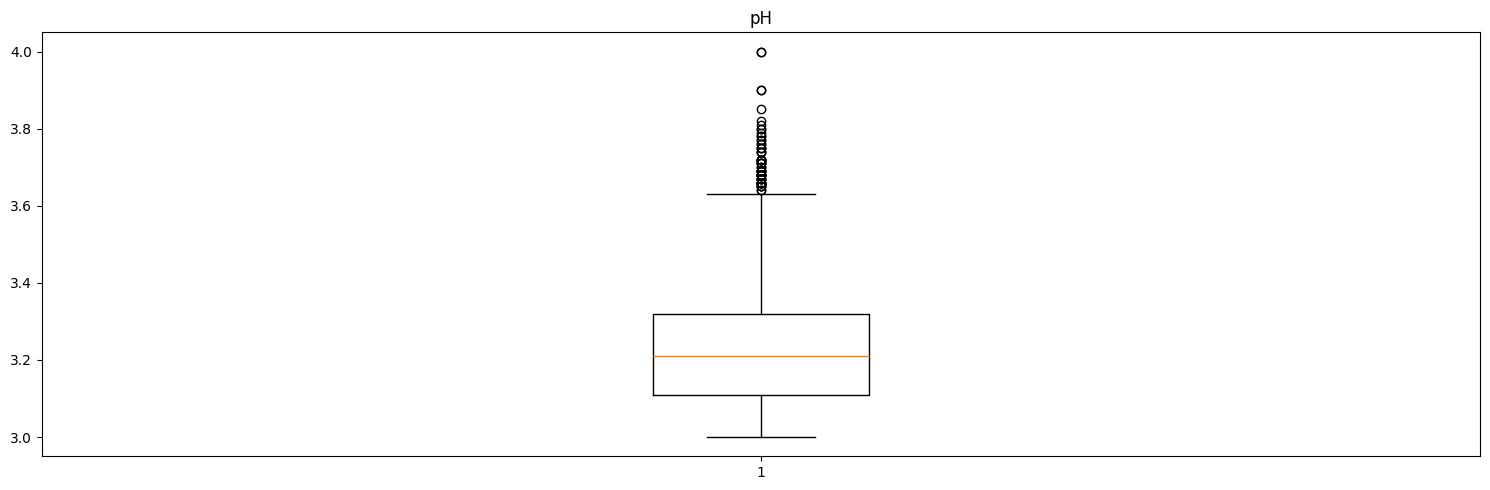

In [492]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

axs.boxplot(df['pH'])
axs.set_title('pH')

plt.tight_layout()

plt.show()

Aunque sigan existiendo outliers que se alejan de la muestra ahora se ha pasado a un rango más adecuado y estos tienen sentido.

##### Variable: **quality**

Existen 7 tipos de calidades registradas:

In [493]:
possible_qualities = df['quality'].unique()
possible_qualities

array([5, 6, 7, 4, 8, 3, 9], dtype=int64)

Podemos ver su distribución mediante un diagram de barras:

<BarContainer object of 7 artists>

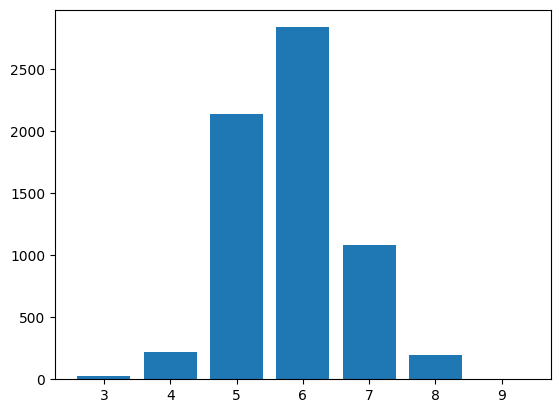

In [494]:
quality_freq = df['quality'].value_counts()
plt.bar(quality_freq.index, quality_freq.values)

Se trata de una variable numérica discreta que podemos tratar como categórica, además en el diagrama de barras vemos que las clases no están igualmente de representadas, siendo la más frecuente los vinos con calidad 6. Una acción que podemos tomar es agrupar en 3 categorías:

- malo: 3-5
- normal: 6
- bueno: 7-9

Esta agrupación nos permite reducir la dimensionalidad del espacio de valores posibles y conseguir categorías con frecuencias más próximas

C:\Users\alfre\AppData\Local\Temp\ipykernel_19496\2396408820.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'bad' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[bad, var] = 'bad'


<BarContainer object of 3 artists>

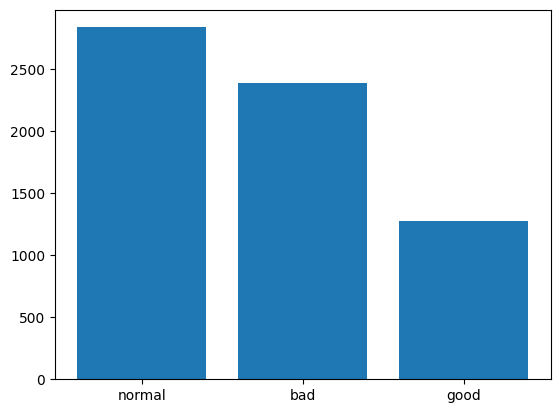

In [495]:
var = 'quality'

bad = df.loc[:, var] <= 5
normal = df.loc[:, var] == 6
good = df.loc[:, var] > 6

df.loc[bad, var] = 'bad'
df.loc[normal, var] = 'normal'
df.loc[good, var] = 'good'

quality_freq = df['quality'].value_counts()
plt.bar(quality_freq.index, quality_freq.values)

Comprobamos que ha tenido éxito la transformación

In [496]:
df.loc[:, ['quality']].head()

quality
id        
0      bad
1      bad
2      bad
3   normal
4      bad

##### Variable: **winetype**

La variable **wine type** no sabemos como se ha estimado, pero es sencilla, solo toma dos valores:

In [497]:
df['wine type'].unique()

array([1, 2], dtype=int64)

Se trata de un tipo de vino, esto es, una variable categórica binaria.

Existen más vinos que pertenecen al tipo 2 que al tipo 1:

In [498]:
winetype_freq = df['wine type'].value_counts()
winetype_freq

wine type
2    4896
1    1599
Name: count, dtype: int64

Con un diagrama de barras se observa mejor:

<BarContainer object of 2 artists>

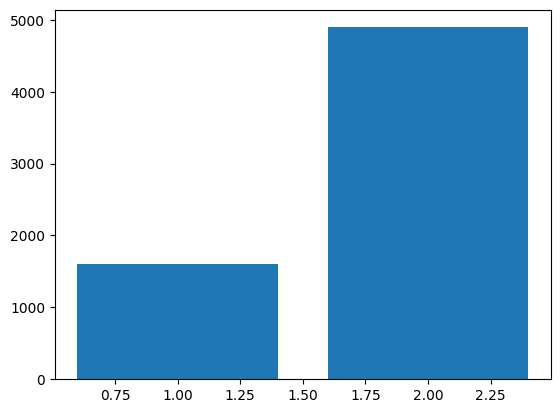

In [499]:
plt.bar(winetype_freq.index, winetype_freq.values)

No tenemos opciones sencillas para igualar la representación.

##### Variable: **alcohol**

El alcohol en el vino se expresa en tanto por ciento y ronda entre 5.5% y 25%. Lo cual es coherente con los valores del dataset (suponemos que utilizan esta métrica).

In [500]:
df.describe().drop('count').T.loc[['alcohol'], :]

mean       std  min  25%   50%   75%   max
alcohol  10.491136  1.192268  8.0  9.5  10.3  11.3  14.9

Con un boxplot nos hacemos idea de la cantidad de outliers y como se distribuyen los valores de la variable:

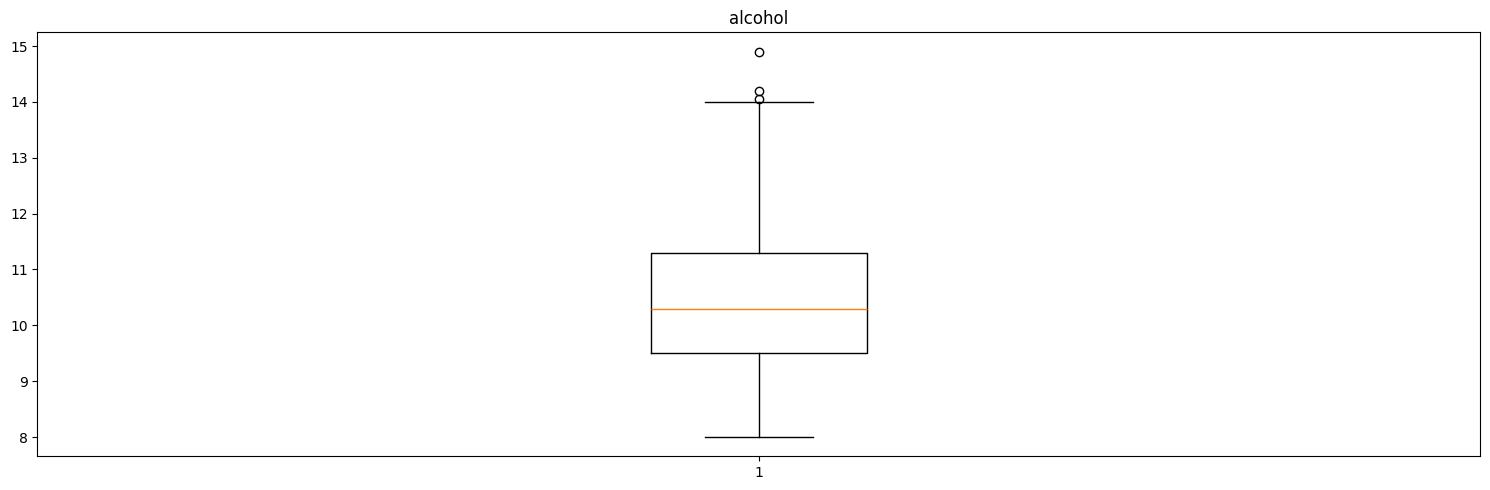

In [501]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

axs.boxplot(df['alcohol'])
axs.set_title('alcohol')

plt.tight_layout()

plt.show()

Como ya hemos mencionado es conveniente trabajar con las variables **quality** y **wine type** como variables categóricas.

La librería pandas dispone de un tipo categórico llamado **"category"** pero para el tipo de algoritmo no interesa convertir a **"object"**.

In [502]:
categorical_vars = ['quality', 'wine type']
df[categorical_vars] = df[categorical_vars].astype('object')
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
id                                                                            
0             7.4              0.70         0.00             1.9      0.076   
1             7.8              0.88         0.00             2.6      0.098   
2             7.8              0.76         0.04             2.3      0.092   
3            11.2              0.28         0.56             1.9      0.075   
4             7.4              0.70         0.00             1.9      0.076   

    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
id                                                                        
0                  11.0                  34.0   0.9978  3.51       0.56   
1                  25.0                  67.0   0.9968  3.20       0.68   
2                  15.0                  54.0   0.9970  3.26       0.65   
3                  17.0                  60.0   0.9980  3.16       0.58   
4                  11.0                  34.0   0.9978  3.51       0.56   

   quality wine type  alcohol  
id                             
0      bad         1      9.4  
1      bad         1      9.8  
2      bad         1      9.8  
3   normal         1      9.8  
4      bad         1      9.4

Finalmente una vez se han estudiado este subconjunto de variables, se realiza una eliminación de outliers utilizando el rango intercuartílico (IQR).

Se define una función para obtener un pandas dataframe con los límites a partir de los que categorizamos como outlier utilizando IQR:

In [503]:
import pandas as pd

def get_outlier_bounds(df:pd.DataFrame, selected_cols:list):
    selected_df = df[selected_cols]

    # Calcular el cuartil 1 (Q1) y el cuartil 3 (Q3)
    Q1 = selected_df.quantile(0.25)
    Q3 = selected_df.quantile(0.75)

    IQR = Q3 - Q1
    outliers_range = 1.5 * IQR

    lower_bound = Q1 - outliers_range
    upper_bound = Q3 + outliers_range

    outlier_bounds = pd.DataFrame({'lower_bound': lower_bound, 'upper_bound': upper_bound})

    return outlier_bounds


get_outlier_bounds(df, ['pH']).head()

lower_bound  upper_bound
pH        2.795        3.635

Para saber cuando quitar outliers lo que haremos será ver si escasean (bajo un cierto umbral) en cuyo caso eliminaremos.

In [504]:
categorical_vars = ['wine type', 'quality']
df_non_categorical = df.drop(categorical_vars, axis=1)
df_bounds = get_outlier_bounds(df_non_categorical, df_non_categorical.columns)
df_bounds

lower_bound  upper_bound
fixed acidity            4.450000     9.650000
volatile acidity        -0.025000     0.655000
citric acid              0.040000     0.600000
residual sugar          -7.650000    17.550000
chlorides               -0.002500     0.105500
free sulfur dioxide    -19.000000    77.000000
total sulfur dioxide   -41.500000   274.500000
density                  0.985365     1.003965
pH                       2.795000     3.635000
sulphates                0.175000     0.855000
alcohol                  6.800000    14.000000

In [505]:
outliers_count = {}

for columna in df_bounds.index:
    lower_bound = df_bounds.loc[columna, 'lower_bound']
    upper_bound = df_bounds.loc[columna, 'upper_bound']
    outliers_count[columna] = ((df[columna] < lower_bound) | (df[columna] > upper_bound)).sum()

outliers_count

{'fixed acidity': 357,
 'volatile acidity': 377,
 'citric acid': 507,
 'residual sugar': 118,
 'chlorides': 286,
 'free sulfur dioxide': 62,
 'total sulfur dioxide': 9,
 'density': 3,
 'pH': 66,
 'sulphates': 191,
 'alcohol': 3}

Entendemos que la existencia de outliers está relacionada con la presencia de diferentes tipos de vinos, si nos fijamos los rangos en los que se mueven los datos (incluso outliers) son aceptables post el análisis sencillo.

Por tanto no los eliminamos.

#### 2- Realizar un análisis sobre los atributos del dataset con el objetivo de entender las posibles relaciones que existen entre ellas y a continuación elige los dos atributos que mayor relación guardan con el atributo  objetivo  (nivel  de  alcohol)  (1  punto).  En  necesario  justificar  la  elección  de  los  atributos mediante la utilización de datos empíricos.

Para ver la relación entre las variables obtenemos la matriz de correlación (omitimos variables categóricas)

In [506]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6495 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6495 non-null   float64
 1   volatile acidity      6495 non-null   float64
 2   citric acid           6495 non-null   float64
 3   residual sugar        6495 non-null   float64
 4   chlorides             6495 non-null   float64
 5   free sulfur dioxide   6495 non-null   float64
 6   total sulfur dioxide  6495 non-null   float64
 7   density               6495 non-null   float64
 8   pH                    6495 non-null   float64
 9   sulphates             6495 non-null   float64
 10  quality               6495 non-null   object 
 11  wine type             6495 non-null   object 
 12  alcohol               6495 non-null   float64
dtypes: float64(11), object(2)
memory usage: 710.4+ KB


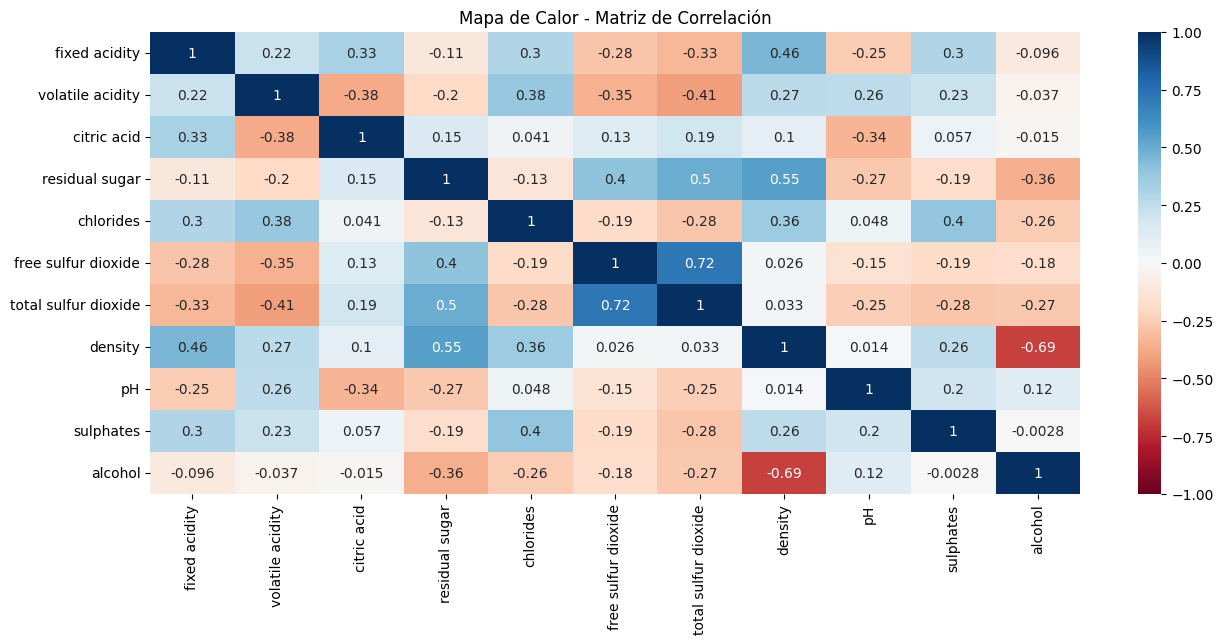

In [507]:
categorical_vars = ['wine type', 'quality']
df_non_categorical = df.drop(categorical_vars, axis=1)

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
sns.heatmap(df_non_categorical.corr(), cmap='RdBu', vmin=-1, vmax=1, annot=True)
plt.title('Mapa de Calor - Matriz de Correlación')
plt.show()

Como se puede observar de estos valores, las dos variables con las correlaciones más fuertes con el nivel de alcohol son:

**Density:** Con un coeficiente de -0.69, esta es la variable con la correlación más fuerte y negativa con el nivel de alcohol. Esto implica que a medida que aumenta la densidad del vino, el nivel de alcohol tiende a disminuir. Dado que el alcohol es menos denso que el agua, un aumento en el contenido de alcohol generalmente reduce la densidad del vino.

**Residual Sugar:** Con un coeficiente de -0.36, esta variable tiene la segunda correlación más fuerte y también negativa con el nivel de alcohol. La presencia de azúcares residuales en altas concentraciones generalmente se asocia con un nivel más bajo de alcohol, ya que indica que no todo el azúcar se ha fermentado para convertirse en alcohol.

Asimismo, nos resulta llamativo que todos los atributos a excepción del "pH" tienen coeficientes negativos, lo que implica que el pH es el único elemento cuya presencia suele implicar mayor nivel de alcohol. Como ya ha sido mencionado, las variables más significativas son "Density" y "Residual sugar", pero además de esas dos, "chlorides"(-0.26), "total sulfur dioxide"(-0.27), "free sulfur dioxide"(-0.18) y "pH"(0.12) también tienen coeficientes que pueden llegar a ser algo explicativos.
El resto de coeficientes son despreciables pues el nivel de significancia es realmente pequeño.

#### 3- Construir  un  modelo  de  regresión  lineal  mediante  un  proceso  analítico  para  una  de  las  variables 
seleccionadas en el punto anterior (1 punto). 

Pasamos ahora a estandarizar los datos, para ello nos servimos de la clase **MinMaxScaler** de **scikit-learn**, esta nos permite llevar los datos a un rango [0, 1].
Antes de aplicar dicha transformación, dividimos los datos en dos subconjuntos de forma aleatoria: datos de entrenamiento (80%) y datos de prueba(20%)

Aplicamos esta transformación sobre los datos que hemos estimado como no categóricos:

In [508]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [509]:
scaler = MinMaxScaler()
numeric_vars = df_train.select_dtypes(exclude='object').columns
df_train[numeric_vars] = scaler.fit_transform(df_train[numeric_vars])

df_train.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
id                                                                              
3802       0.347458          0.086667         0.39        0.021472   0.079734   
947        0.381356          0.133333         0.48        0.023006   0.139535   
877        0.330508          0.423333         0.01        0.023006   0.091362   
3145       0.203390          0.100000         0.36        0.254601   0.049834   
4464       0.237288          0.120000         0.56        0.226994   0.073090   

      free sulfur dioxide  total sulfur dioxide   density    pH  sulphates  \
id                                                                           
3802             0.137457              0.366158  0.089647  0.05   0.168539   
947              0.034364              0.016644  0.134374  0.26   0.224719   
877              0.206186              0.102635  0.127241  0.41   0.196629   
3145             0.247423              0.343967  0.238095  0.23   0.117978   
4464             0.213058              0.374480  0.211876  0.11   0.151685   

     quality wine type   alcohol  
id                                
3802     bad         2  0.483333  
947     good         1  0.733333  
877   normal         1  0.633333  
3145  normal         2  0.133333  
4464     bad         2  0.216667

Destacar que **fit_transform():**  es un método combinado que primero calcula el mínimo y el máximo de los datos (fit) y luego transforma los datos en el rango [0, 1] usando esos valores mínimos y máximos (transform). Con  **df_train[numeric_vars] =:** reemplazamos las columnas numéricas originales en df_train con sus versiones escaladas, normalizando todos los datos numéricos.

Ahora aplicamos la transformación aprendida con los datos de entrenamiento al conjunto de prueba (importante no usar **fit_transform** pues queremos que ambos conjuntos de datos estén en la misma escala que es la de entrenamiento).

In [510]:
# Aplicamos la misma transformación al conjunto de prueba (¡importante usar solo .transform aquí!)
df_test[numeric_vars] = scaler.transform(df_test[numeric_vars])

Definimos las variables **'X'** para las características (en este caso, solo 'density' pues es regresión lineal simple y elegimos la más significativa) y **'y'** para la variable objetivo ('alcohol'); estas están separadas en entrenamiento y prueba.

In [511]:
# Definimos las variables independiente (X) y dependiente (y) para ambos conjuntos
X_train = df_train[['density']]
y_train = df_train['alcohol']
X_test = df_test[['density']]
y_test = df_test['alcohol']

A continuación, creamos y entrenamos el modelo de regresión lineal para ver como se  utilizando los datos de entrenamiento. El modelo aprende cómo la variable 'density' se relaciona con 'alcohol'.

In [512]:
# Creamos y entrenamos el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Utilizamos los datos de prueba para predecir el porcentaje de alcohol basado en la densidad y evaluamos el rendimiento calculando el coeficiente de determinación **(R²)**, el error cuadrático medio **(MSE)** y la raíz del error cuadrático medio **(RMSE)** para evaluar el rendimiento del modelo.

In [513]:
# Predecimos y evaluamos el modelo con el conjunto de prueba
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Imprimimos resultados del modelo
print(f"Coeficiente de pendiente (b1) para 'density': {model.coef_[0]:.4f}")
print(f"Coeficiente de determinación R^2: {r2:.4f}")
print(f"Error cuadrático medio (MSE): {mse:.4f}")
print(f"Raíz del error cuadrático medio (RMSE): {rmse:.4f}")

Coeficiente de pendiente (b1) para 'density': -2.3183
Coeficiente de determinación R^2: 0.4960
Error cuadrático medio (MSE): 0.0211
Raíz del error cuadrático medio (RMSE): 0.1451


El coeficiente de pendiente indica el cambio en la variable dependiente (alcohol) por cada unidad de cambio en la variable independiente (density). Es decir, un coeficiente de -2.3183 sugiere que por cada aumento unitario en la densidad (en la escala transformada a Min-Max entre 0 y 1), el porcentaje de alcohol disminuirá en 2.3183 unidades.

El coeficiente de determinación **R²** indica la proporción de la variabilidad en la variable dependiente que es predecible a partir de las variables independientes. Un R² de 0.4960 significa que aproximadamente el 49.60% de la variación en el porcentaje de alcohol puede ser explicada por las variaciones en la densidad. Esto refleja que es un predictor significativo (pues explica la mitad de la variabilidad), pero también que hay otros factores que afectan el porcentaje de alcohol que no están incluidos en este modelo (el resto de variables).

El Error Cuadrático Medio **(MSE)** representa la media de los cuadrados de los errores, es decir, el promedio de las diferencias al cuadrado entre los valores observados y los valores predichos. Un MSE de 0.0211 indica que las predicciones del modelo están bastante cerca de los valores reales, en promedio.

El **RMSE** es simplemente la raíz cuadrada del MSE y proporciona una medida de la magnitud del error en las mismas unidades que la variable de respuesta. Un RMSE de 0.1451 indica que las predicciones del modelo se desvían del valor real por aproximadamente 0.1451 unidades en la escala de porcentaje de alcohol. Considerando que la escala de alcohol va desde aproximadamente de 8% a 15%, el error es extremadamente pequeño.

Finalmente, generamos un gráfico de dispersión que muestra tanto los valores reales como los predichos para proporcionar una visualización clara de cómo el modelo ha actuado con respecto a los datos reales.

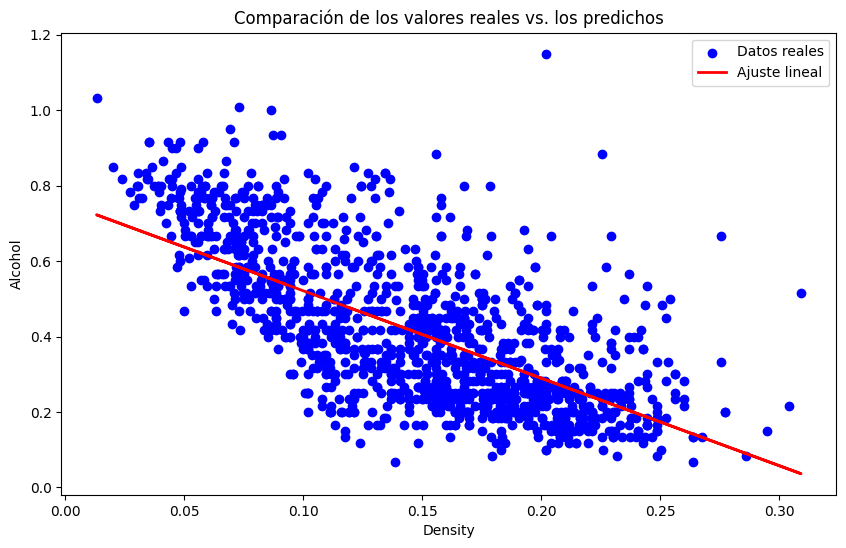

In [514]:
# Gráfico de dispersión de los valores reales vs. los predichos
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Ajuste lineal')
plt.title('Comparación de los valores reales vs. los predichos')
plt.xlabel('Density')
plt.ylabel('Alcohol')
plt.legend()
plt.show()

Teniendo en cuenta el gráfico y los datos obtenidos anteriormente, podemos concluir que el modelo predice bastante bien el porcentaje de alcohol basado en la densidad. Esto se aprecia especialmente en las métricas de error, que sugieren predicciones muy precisas.

Sin embargo, observando el valor de R² (49,6%) podemos darnos cuenta que un modelo de regresión lineal múltiple con más predictores explicaría mejor la variable objetivo.

#### 4- Calcular el error en el modelo obtenidos en el punto anterior (0.5 puntos).  

Calculamos el **MAE**(mean absolute error) con la función **mean_absolute_error** que toma dos argumentos: los valores reales (y_test) y los valores predichos por el modelo (y_pred). Calcula el promedio de los valores absolutos de las diferencias entre los valores reales y predichos. El MAE proporciona una medida de la magnitud promedio de los errores sin considerar su dirección (es decir, ignora si la predicción es mayor o menor que el valor real).
Obtenemos un error bajo (0.1141), por lo que el modelo hace predicciones que están cerca de los valores reales.

In [515]:
# Calculo del MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"Error Absoluto Medio (MAE): {mae:.4f}")

Error Absoluto Medio (MAE): 0.1141


Por último, calculamos y representamod con un gráfico de dispersión los residuos, que son calculados como la diferencia entre los valores reales (y_test) y los valores predichos (y_pred).
Estos residuos son el error de cada predicción individual.

### Ejercicio 2: Regresión lineal múltiple

In [516]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

#### Análisis del dataset (distinto de el del ejercicio anterior)

In [517]:
df = pd.read_csv(filename, delimiter=';')
df.head()

id  fixed acidity  volatile acidity  citric acid  residual sugar  \
0   0            7.4              0.70         0.00             1.9   
1   1            7.8              0.88         0.00             2.6   
2   2            7.8              0.76         0.04             2.3   
3   3           11.2              0.28         0.56             1.9   
4   4            7.4              0.70         0.00             1.9   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.076                 11.0                  34.0   0.9978  3.51   
1      0.098                 25.0                  67.0   0.9968  3.20   
2      0.092                 15.0                  54.0   0.9970  3.26   
3      0.075                 17.0                  60.0   0.9980  3.16   
4      0.076                 11.0                  34.0   0.9978  3.51   

   sulphates  quality  wine type  alcohol  
0       0.56        5          1      9.4  
1       0.68        5          1      9.8  
2       0.65        5          1      9.8  
3       0.58        6          1      9.8  
4       0.56        5          1      9.4

La columna 'id' es innecesaria.  Se elimina.

In [518]:
df = df.drop(columns = ['id'])

In [519]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  quality               6497 non-null   int64  
 11  wine type             6497 non-null   int64  
 12  alcohol               6497 non-null   float64
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


No hay valores NaN y cada variable contiene 6497 observaciones.

Se pasarán quality y wine type a dummies, ya que sus valores son enteros que se refieren a distintas categorías: wine type tiene las categorías 1 y 2 y quality tiene las categorías 4, 5, 6, 7, 8, 9.

In [520]:
df2 = df.drop(columns = ['wine type','quality']) # esto se usará más adelante
df = pd.get_dummies(df, columns=['quality', 'wine type'], drop_first=True)

Se verá ahora la distribución de la variable objetivo, que es el grado de alcohol.

C:\Users\alfre\AppData\Local\Temp\ipykernel_19496\211739923.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['alcohol'], shade=True, color='blue')


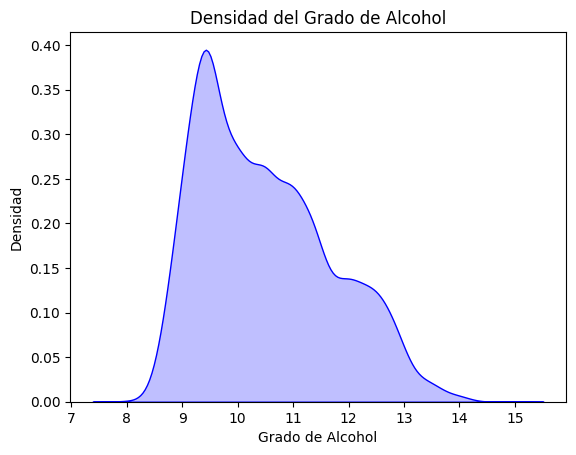

In [521]:
sns.kdeplot(df['alcohol'], shade=True, color='blue')
plt.title('Densidad del Grado de Alcohol')
plt.xlabel('Grado de Alcohol')
plt.ylabel('Densidad')
plt.show()

La variable objetivo es continua.  Toma valores desde 8 a 14.9 grados.  La mayor parte de los vinos están entre los 9 y 10 grados de alcohol.  Desde los 10 grados de alcohol, empiezan a haber menos vinos con más de 10 grados.

Esto debe tenerse en cuenta a la hora de predecir el grado de alcohol, pues hay muchos más datos con cierto grado de alcohol, como ya se ha mencionado.

Ahora se estudiará la multicolinealidad entre variables, la cual es preferible eliminar.

C:\Users\alfre\AppData\Local\Temp\ipykernel_19496\3291259726.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(calidad, rotation=45)
C:\Users\alfre\AppData\Local\Temp\ipykernel_19496\3291259726.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(['Tipo 1', 'Tipo 2'], rotation=0)


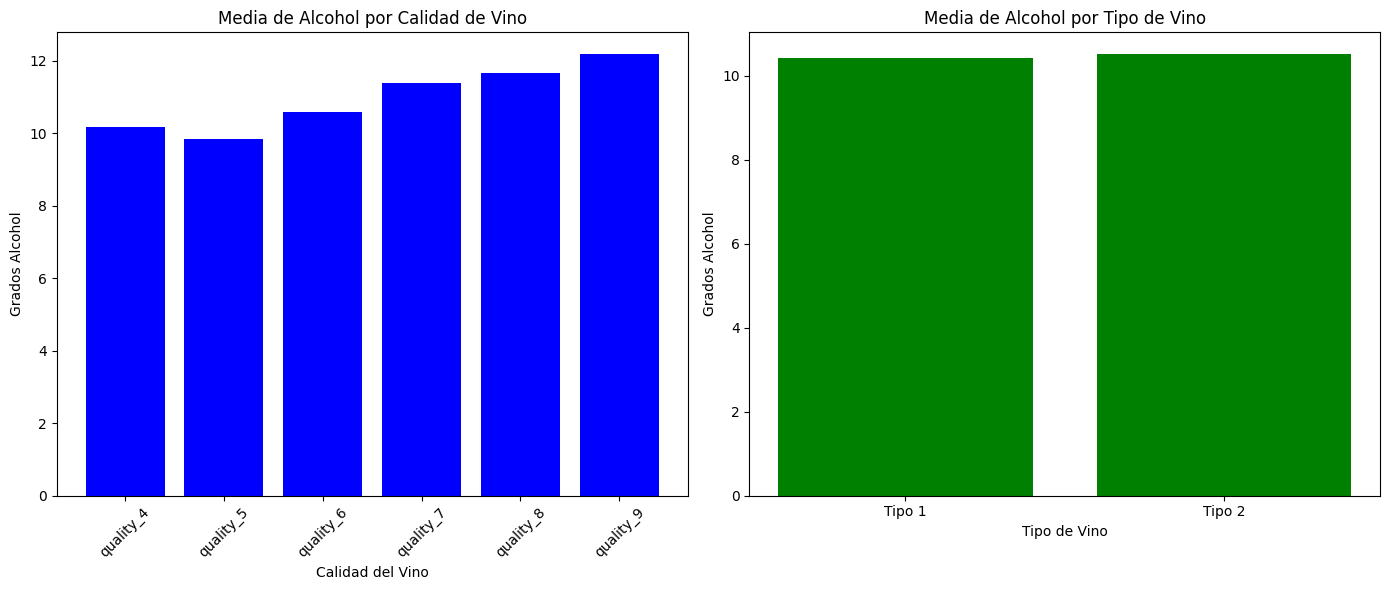

In [522]:
calidad = [f'quality_{i}' for i in range(4, 10) if f'quality_{i}' in df.columns]
media_alcohol_calidad= [df[df[label] == 1]['alcohol'].mean() for label in calidad]

tipo_vino = ['wine type_1', 'wine type_2']
media_alcohol_tipo = [df[df['wine type_2'] == (i-1)]['alcohol'].mean() for i in range(1, 3)]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.bar(calidad, media_alcohol_calidad, color='blue')
ax1.set_title('Media de Alcohol por Calidad de Vino')
ax1.set_xlabel('Calidad del Vino')
ax1.set_ylabel('Grados Alcohol')
ax1.set_xticklabels(calidad, rotation=45)

ax2.bar(tipo_vino, media_alcohol_tipo, color='green')
ax2.set_title('Media de Alcohol por Tipo de Vino')
ax2.set_xlabel('Tipo de Vino')
ax2.set_ylabel('Grados Alcohol')
ax2.set_xticklabels(['Tipo 1', 'Tipo 2'], rotation=0)

plt.tight_layout()
plt.show()


Con respecto de las variables dummy de quality y wine type, puede verse, sobre todo con wine type, que cada categoría tiene una media muy similar o igual a las demás de grado de alcohol.  Esto puede indicar una baja relación de dichas variables con la variable objetivo.

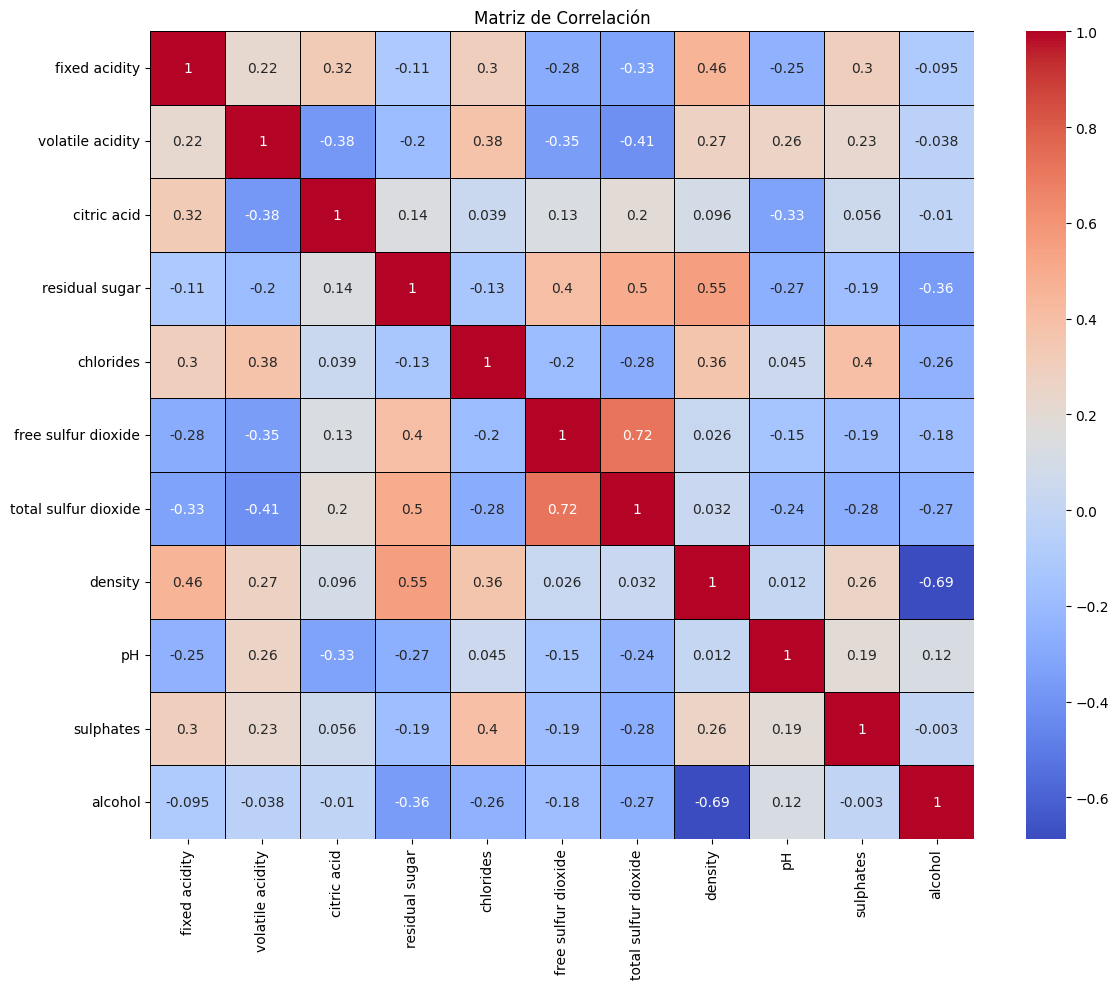

In [523]:
correlation_matrix = df2.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black')

plt.title('Matriz de Correlación')
plt.tight_layout()
plt.show()

Las variables más correlacionadas con 'alcohol' son 'density' y 'residual sugar', aunque se trata de una relación débil.  Las variables menos correlacionadas con 'density' son 'citric acid', 'free sulfur dioxide' y 'pH'. Los atributos menos relacionados con 'residual sugar' son 'citric acids' y 'chlorides'.  Estas pueden ser útiles, pues se evita la multicolinealidad.

In [524]:
print('Las variables más dependientes entre sí son:\n')
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        correlation = correlation_matrix.iloc[i, j]
        if correlation >= abs(0.5):
            var1 = correlation_matrix.columns[i]
            var2 = correlation_matrix.columns[j]
            print(f"{var1} y {var2}")


Las variables más dependientes entre sí son:

residual sugar y density
free sulfur dioxide y total sulfur dioxide


No hay correlaciones demasiado fuertes.  Tomando las correlaciones mayores o iguales a 0.5 en valor absoluto, las variables más correlacionadas son: **free sulfur dioxide** + **total sulfur dioxide** y **residual sugar** + **density**.  La primera es una correlación positiva y la tercera es negativa.


Para este modelo de regresión múltiple, se tendrán en cuenta los siguientes atributos: free sulfur dioxide, density, residual sugar, pH y citric acid, en base al previo análisis de dependencia entre variables.  También se ha añadido la variable 'wine type2', ya que al probar se ha visto una mejora razonable en el rendimiento del modelo.

#### 1- Crear los diferentes conjuntos de entrenamiento y test para el dataset (0.25 puntos).  

Se dividen los datos en conjuntos de entrenamiento y test:

In [525]:
X = df.drop('alcohol', axis=1)
y = df['alcohol']

# División del dataset en conjunto de entrenamiento y de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)

Tamaño del conjunto de entrenamiento: (4872, 17)
Tamaño del conjunto de prueba: (1625, 17)


#### 2- Construir  un  modelo  de  regresión  que  utilice  al  menos  4  de  los  atributos (1.5 puntos)
Disponibles en el dataset mediante la utilización de un proceso aprendizaje iterativo. (es  posible  utilizar  más atributos)

A continuación se construye el modelo de regresión lineal múltiple.

In [526]:
atributos = df[['free sulfur dioxide','residual sugar','wine type_2', 'density','pH','citric acid','chlorides']]
objetivo = df['alcohol']
X_train, X_test, y_train, y_test = train_test_split(atributos, objetivo, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape

((5197, 7), (1300, 7), (5197,), (1300,))

Para hacer el aprendizaje iterativo, se empleará el método de descenso de gradiente.

In [527]:
def gradient_descent(X, y, lr=0.01, iterations=1000):
    m, n = X.shape
    # añadir intercepto
    X = np.c_[np.ones((m, 1)), X]
    # inicializar pesos
    theta = np.zeros(n + 1)
    cost_history = []

    for i in range(iterations):

        predictions = X.dot(theta)
        error = predictions - y
        # se calcula el gradiente
        gradients = 1/m * X.T.dot(error)

        theta -= lr * gradients
        cost = (1/(2*m)) * np.sum(error**2)
        cost_history.append(cost)

    return theta, cost_history

theta, cost_history = gradient_descent(X_train_scaled, y_train, lr=0.1, iterations=5000)

theta, cost_history[-1]

(array([10.48360144, -0.13242054,  0.75548301, -0.80759087, -1.53511601,
         0.16421727,  0.25762156, -0.11194981]),
 0.22079798451919583)

El intercepto es aproximadamente 10.5, lo que indica que si hubiera un vino con todas las características del modelo igual a 0, tendría esos grados de alcohol.

In [528]:
def predict(X, theta):
    X = np.c_[np.ones((X.shape[0], 1)), X]
    return X.dot(theta)

y_pred = predict(X_test_scaled, theta)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

rmse

0.6596250619680457

#### 3- Calcular el error del modelo (0.5 puntos).

El error MSE es 0.6, lo que indica que, de media, las predicciones difieren en 0.6 grados de alcohol.

In [529]:
y_mean = np.mean(y_test)
ss_res = np.sum((y_test - y_pred) ** 2)
ss_tot = np.sum((y_test - y_mean) ** 2)
r_squared = 1 - (ss_res / ss_tot)

r_squared

0.6965724240505766

El R^2 es casi 0.7, por lo que el modelo puede considerarse bueno.

### Ejercicio 3: Agrupamiento

Importamos todas las liberías necesarias a lo largo de la práctica:

In [530]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [531]:
data = pd.read_csv(filename, delimiter=';')
data.head()

id  fixed acidity  volatile acidity  citric acid  residual sugar  \
0   0            7.4              0.70         0.00             1.9   
1   1            7.8              0.88         0.00             2.6   
2   2            7.8              0.76         0.04             2.3   
3   3           11.2              0.28         0.56             1.9   
4   4            7.4              0.70         0.00             1.9   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.076                 11.0                  34.0   0.9978  3.51   
1      0.098                 25.0                  67.0   0.9968  3.20   
2      0.092                 15.0                  54.0   0.9970  3.26   
3      0.075                 17.0                  60.0   0.9980  3.16   
4      0.076                 11.0                  34.0   0.9978  3.51   

   sulphates  quality  wine type  alcohol  
0       0.56        5          1      9.4  
1       0.68        5          1      9.8  
2       0.65        5          1      9.8  
3       0.58        6          1      9.8  
4       0.56        5          1      9.4

#### 1- Realizar todo el proceso de preparación, limpieza, eliminación y análisis de los datos con el objetivo de identificar aquellas variables candidatas para el proceso de agrupamiento (0.5 puntos). 

Vamos a quitar la columna id ya que no resulta de utilidad para el análisis al tratarse de un mero identificador

In [532]:
data.drop('id', axis=1, inplace=True)

Vamos a comprobar si hay NaNs en nuestro set de datos:

In [533]:
null_values = data.isnull().sum()
null_values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
quality                 0
wine type               0
alcohol                 0
dtype: int64

No hay NaNs.

Vamos a visualizar las distribuciones de las variables de nuestro dataset:

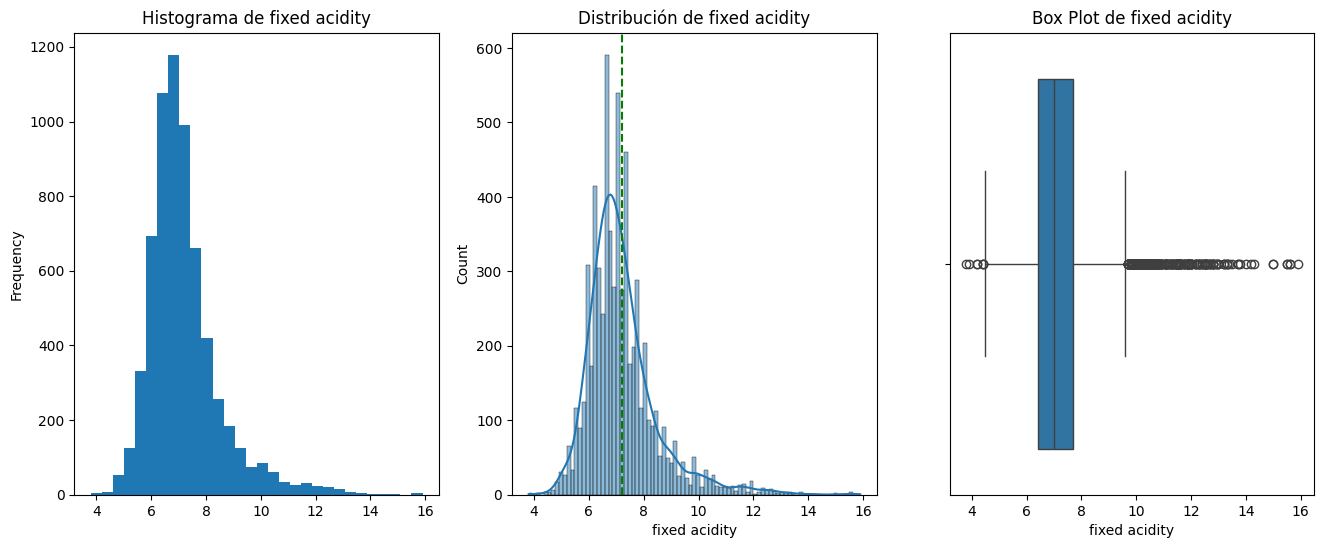

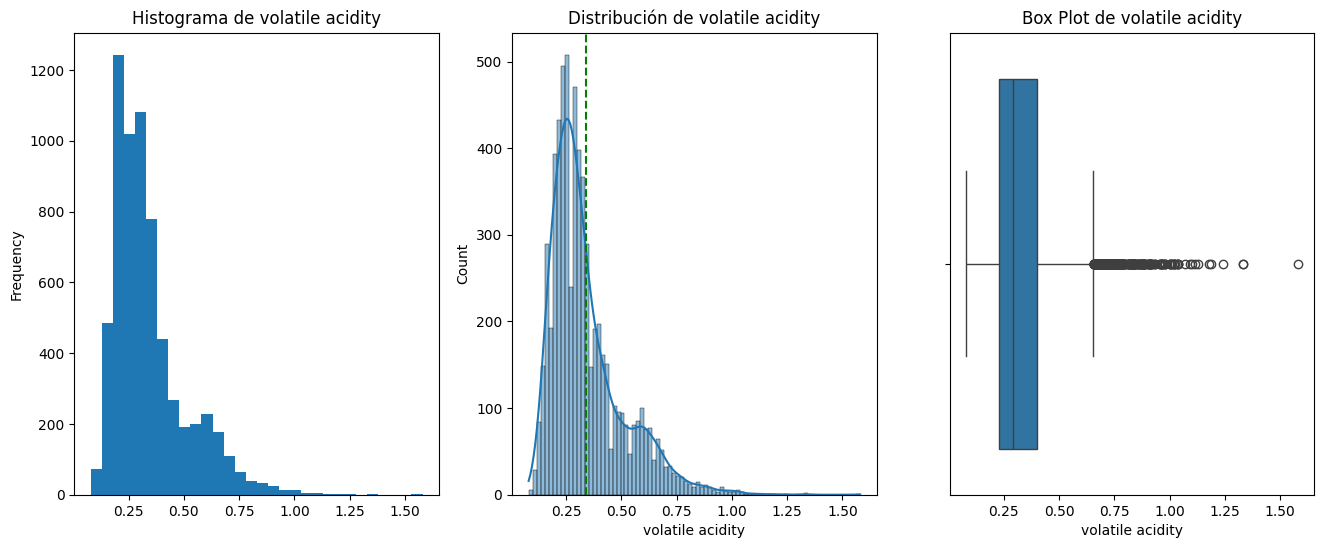

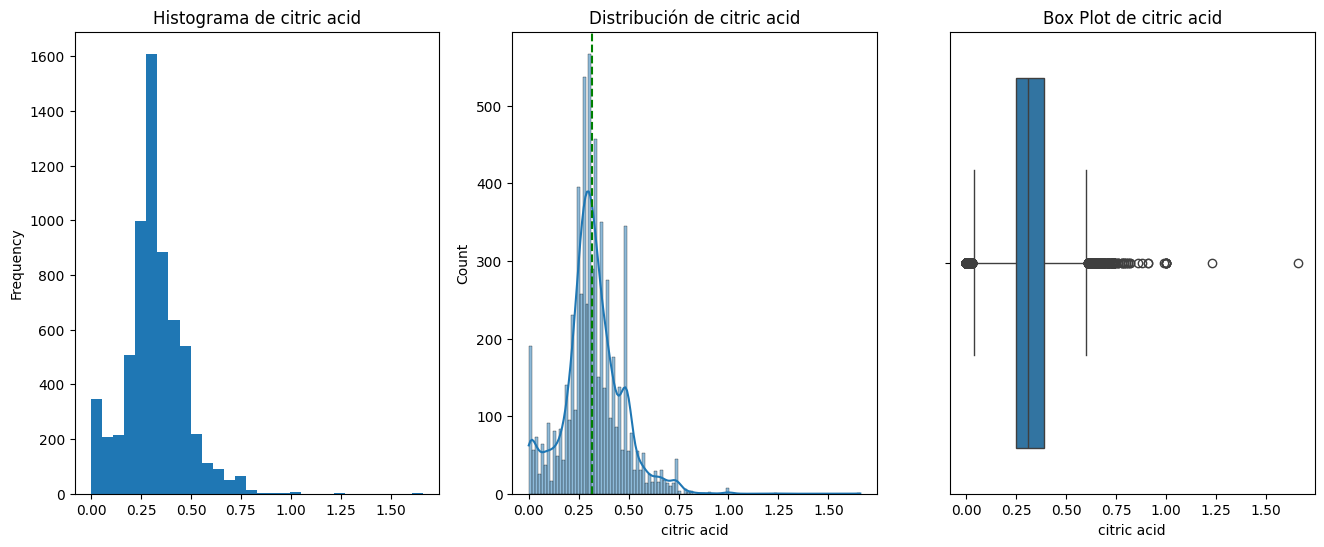

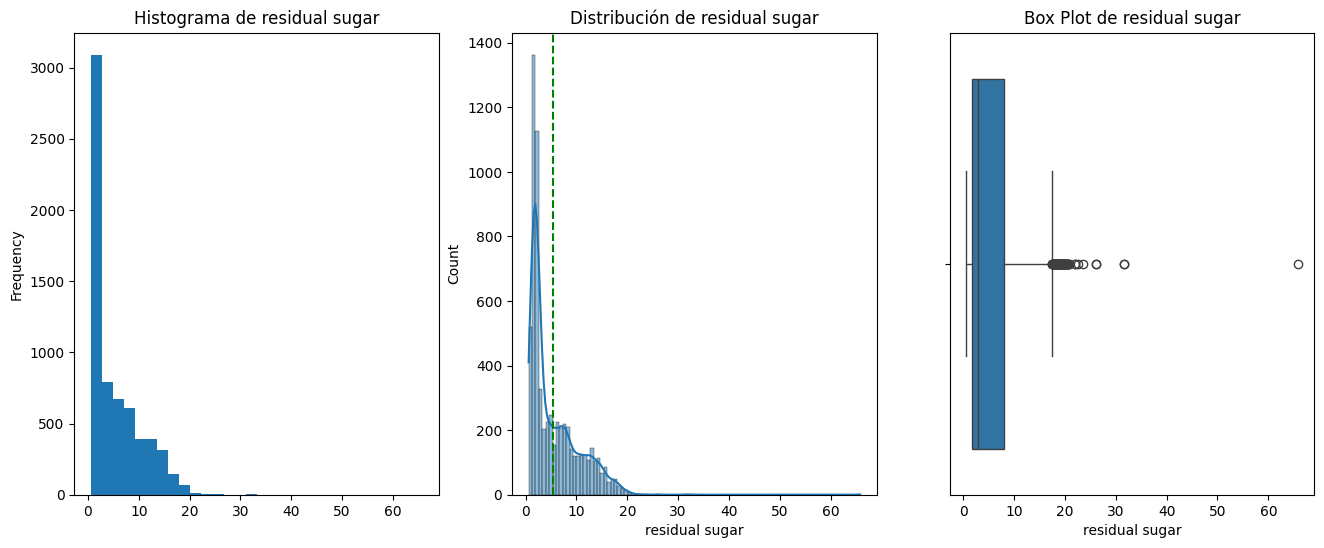

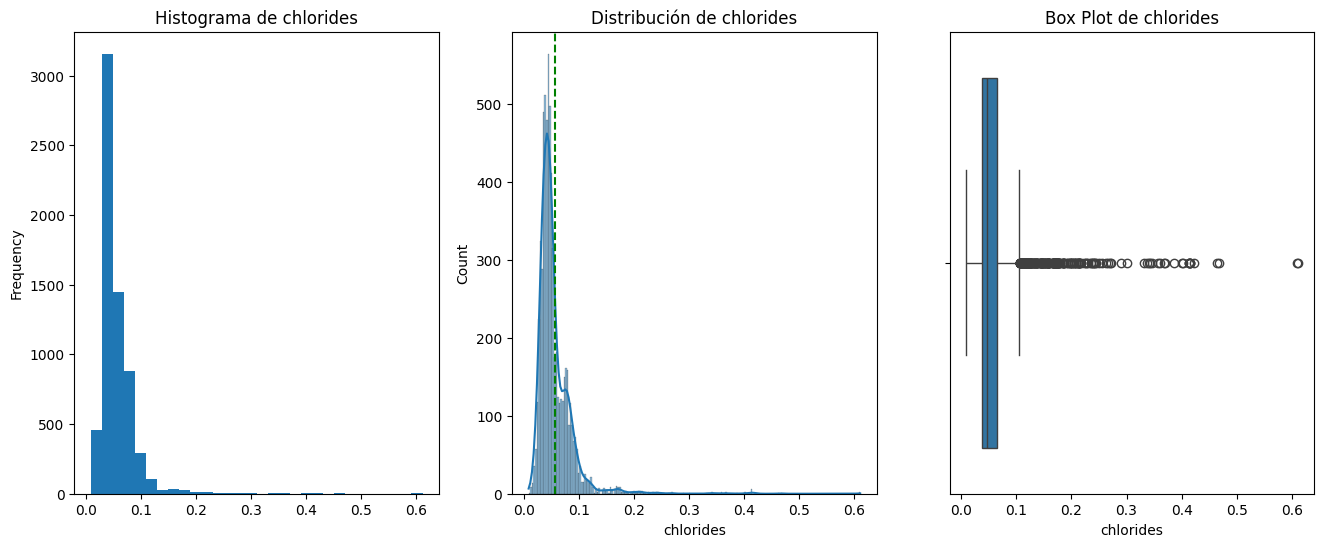

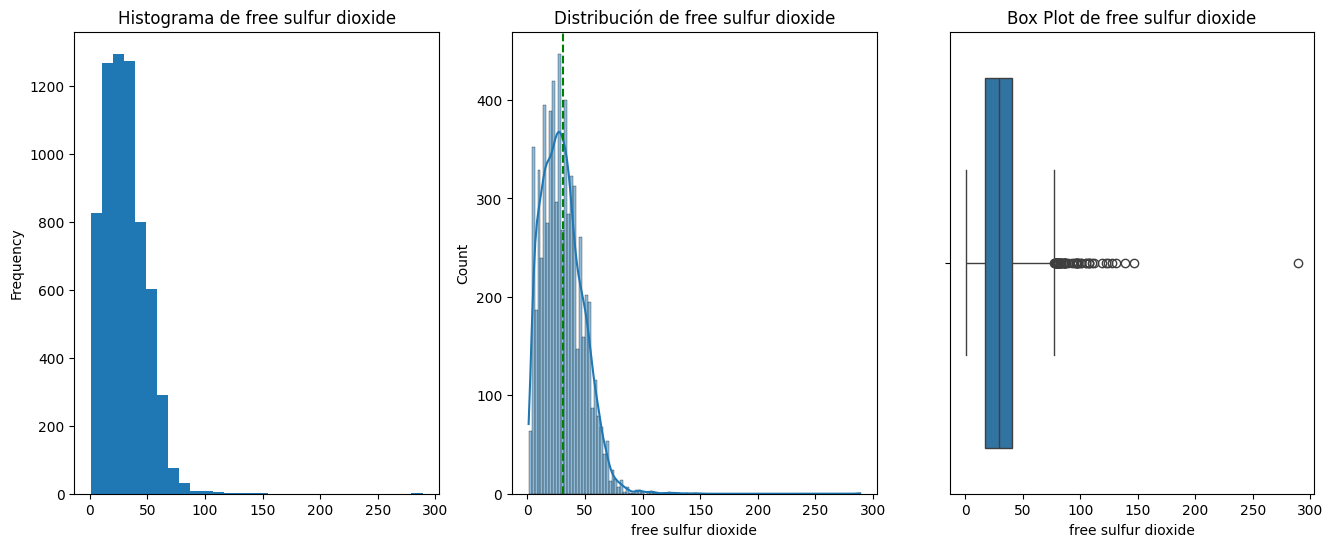

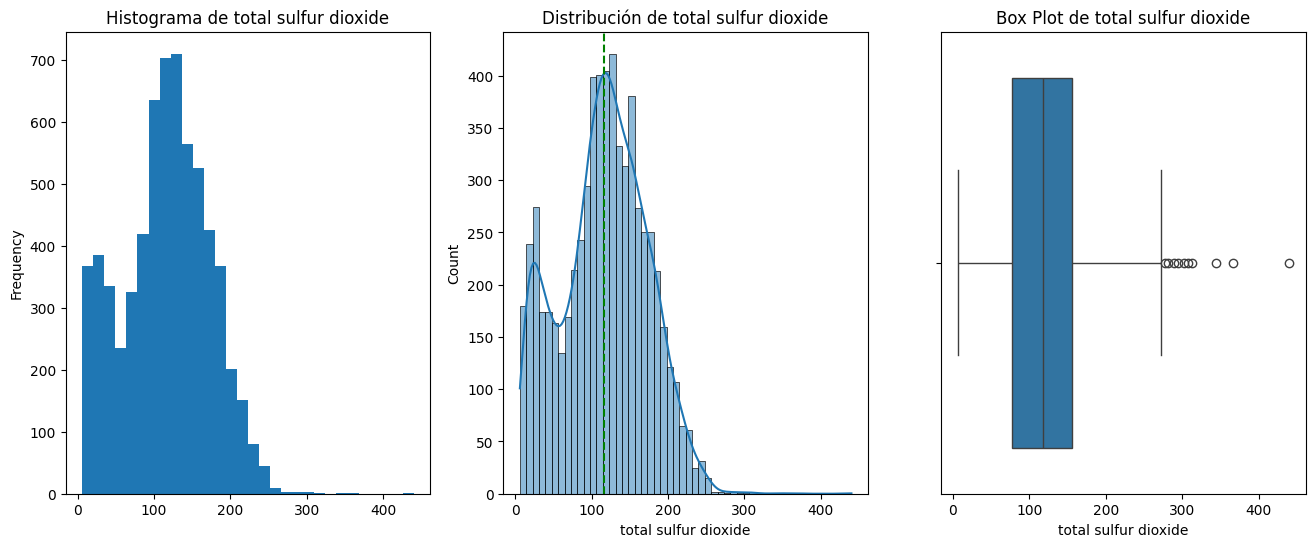

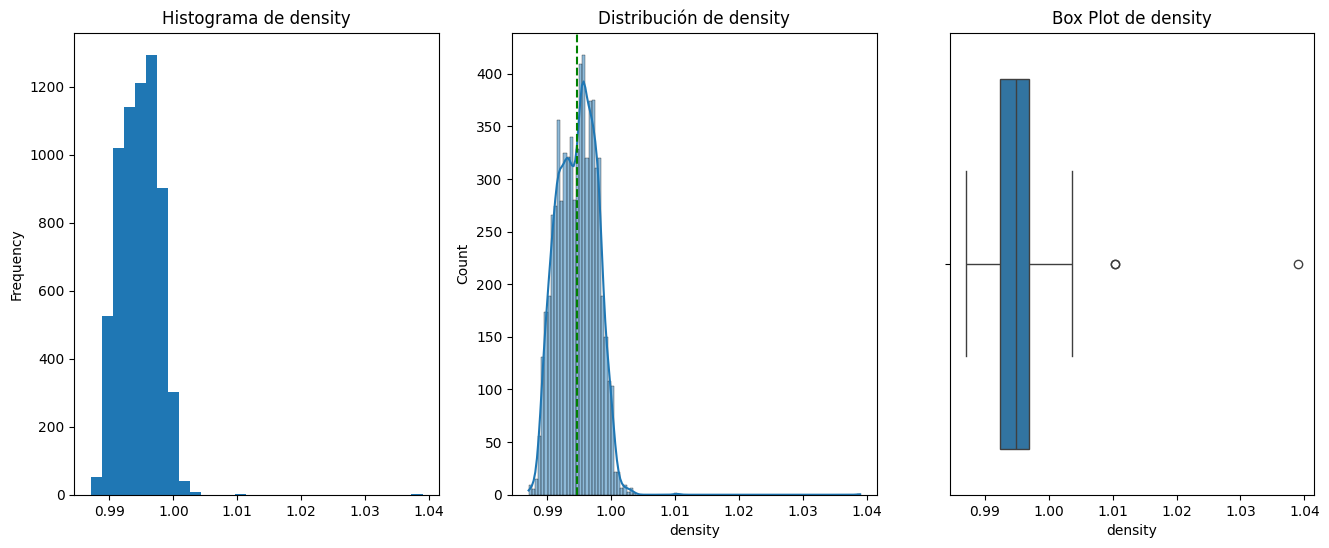

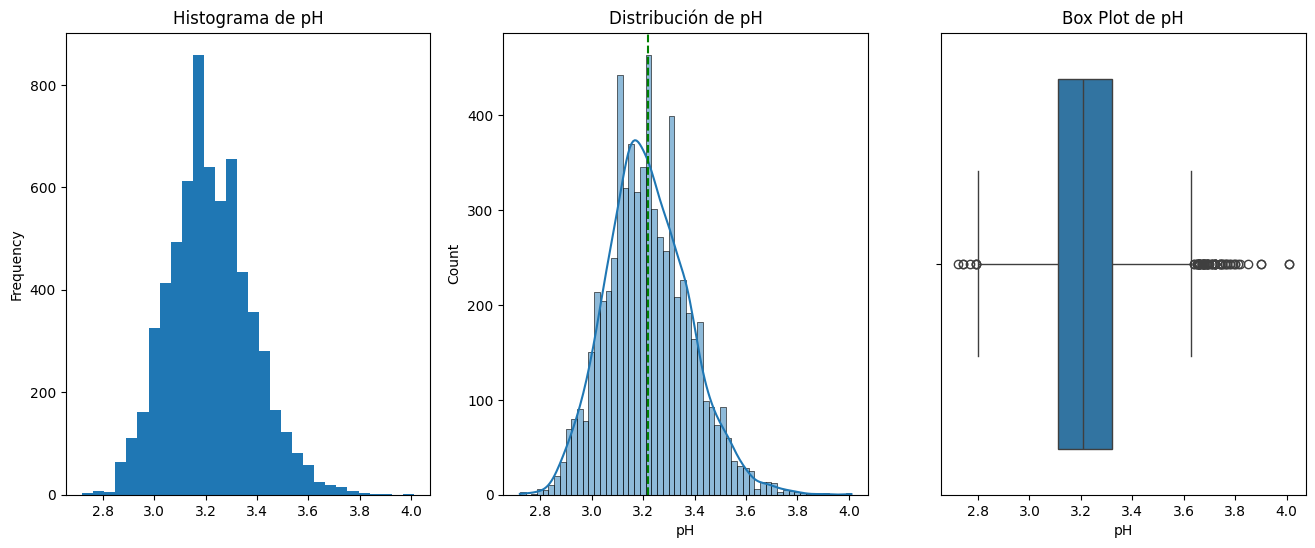

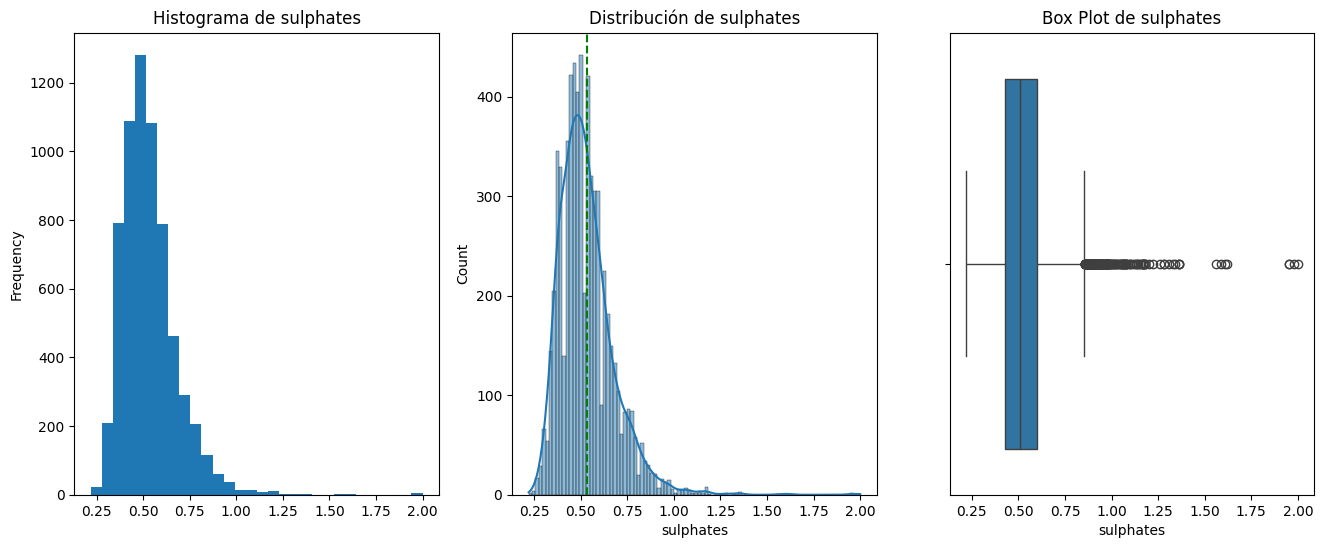

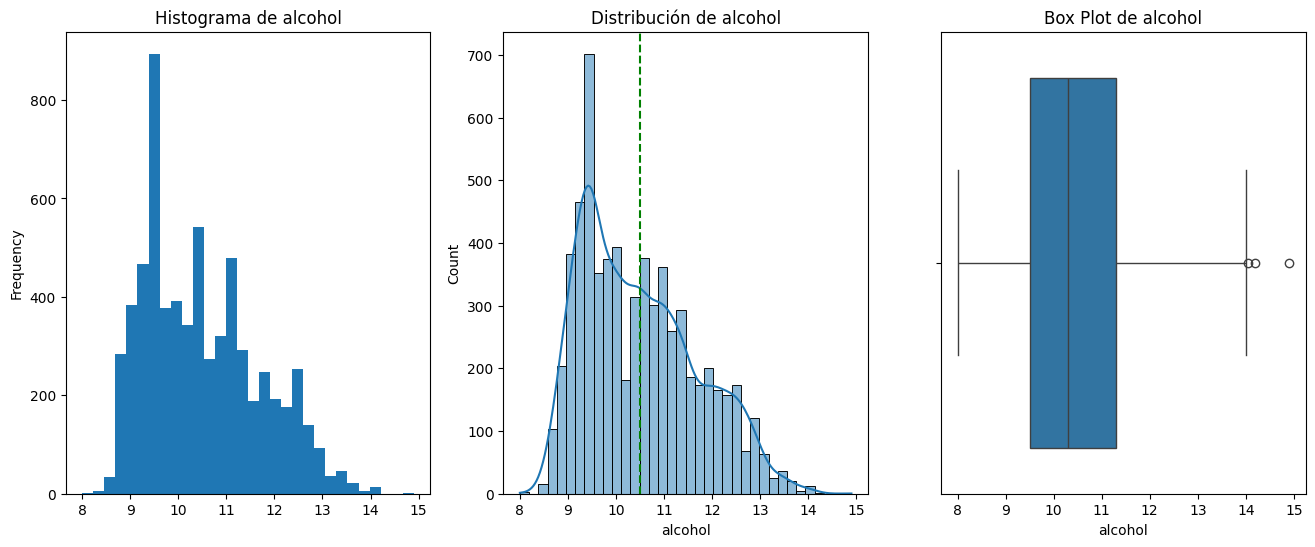

In [534]:
import scipy 
def feat_plot(data, var):
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 3, 1)
    data[var].plot(kind='hist', bins=30)
    plt.title(f'Histograma de {var}')
    
    plt.subplot(1, 3, 2)
    mu, sigma = scipy.stats.norm.fit(data[var])
    sns.histplot(data[var], kde=True)
    plt.axvline(mu, linestyle='--', color='green')
    plt.title(f'Distribución de {var}')
    
    plt.subplot(1, 3, 3)
    sns.boxplot(x=data[var])
    plt.title(f'Box Plot de {var}')
    plt.show()
    
    
numeric_vars = data.select_dtypes(include=['float64', 'int64']).columns.drop(['quality', 'wine type'])  # Excluir id, quality y wine type
for var in numeric_vars:
    feat_plot(data, var)

- Distribuciones Asimétricas: Algunas variables como residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide y alcohol muestran distribuciones altamente asimétricas.
- Distribuciones más simétricas y acotadas: Variables como fixed acidity, pH, density y sulphates parecen tener distribuciones más simétricas y están más concentradas en rangos específicos.
- Variables categóricas: quality y wine type 

La variable quality se trata de una variable numérica discreta que podemos tratar como categórica, además en el diagrama de barras vemos que las clases no están igualmente de representadas, siendo la más frecuente los vinos con calidad 6. Una acción que podemos tomar es agrupar en 3 categorías:

- malo: 3-5
- normal: 6
- bueno: 7-9

Esta agrupación nos permite reducir la dimensionalidad del espacio de valores posibles y conseguir categorías con frecuencias más próximas

C:\Users\alfre\AppData\Local\Temp\ipykernel_19496\764680567.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'bad' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[bad, var] = 'bad'


<BarContainer object of 3 artists>

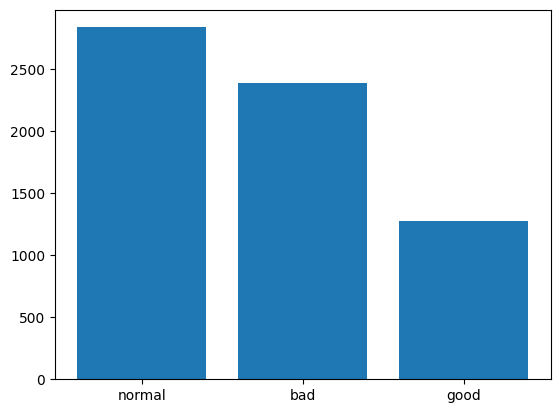

In [535]:
var = 'quality'

bad = data.loc[:, var] <= 5
normal = data.loc[:, var] == 6
good = data.loc[:, var] > 6

data.loc[bad, var] = 'bad'
data.loc[normal, var] = 'normal'
data.loc[good, var] = 'good'

quality_freq = data['quality'].value_counts()
plt.bar(quality_freq.index, quality_freq.values)

Las pasamos a dummies:

In [536]:
data_dummies = pd.get_dummies(data['quality'], prefix='quality')
data = pd.concat([data.drop(columns=['quality']), data_dummies], axis=1)

Convertimos a categórica wine type:

In [537]:
data['wine type'] = data['wine type'].astype('category')

La transformación logarítmica ha ayudado a reducir la asimetría y a manejar los valores extremos de manera más efectiva.

Aplicar la Transformación Logarítmica a las variables con distribuciones sesgadas y presencia de outliers para reducir el sesgo causado por outliers extremos

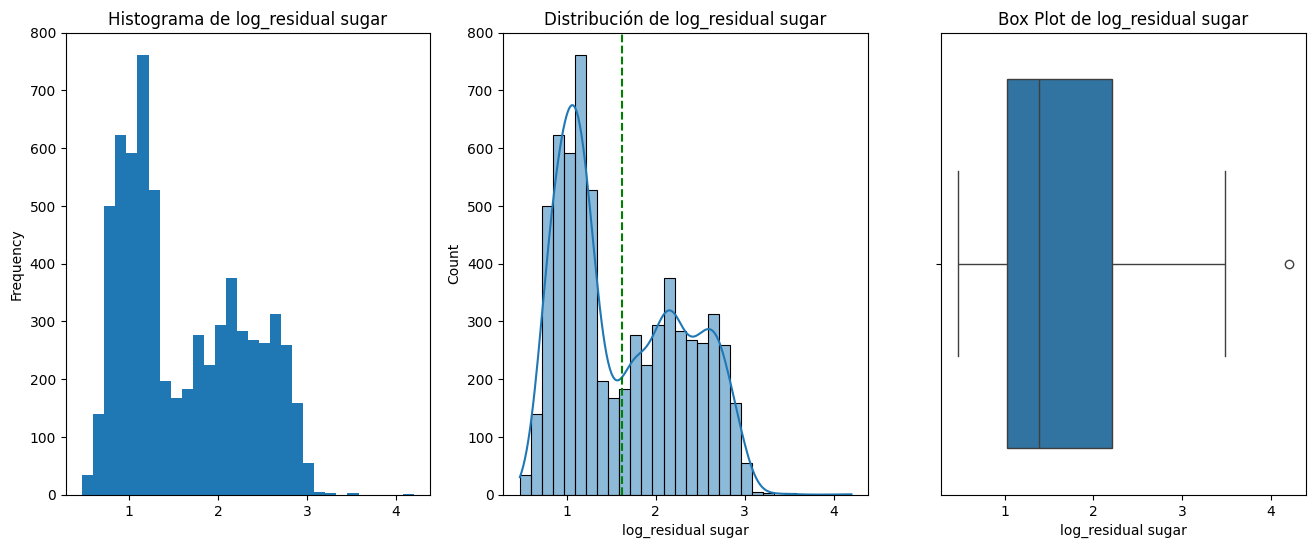

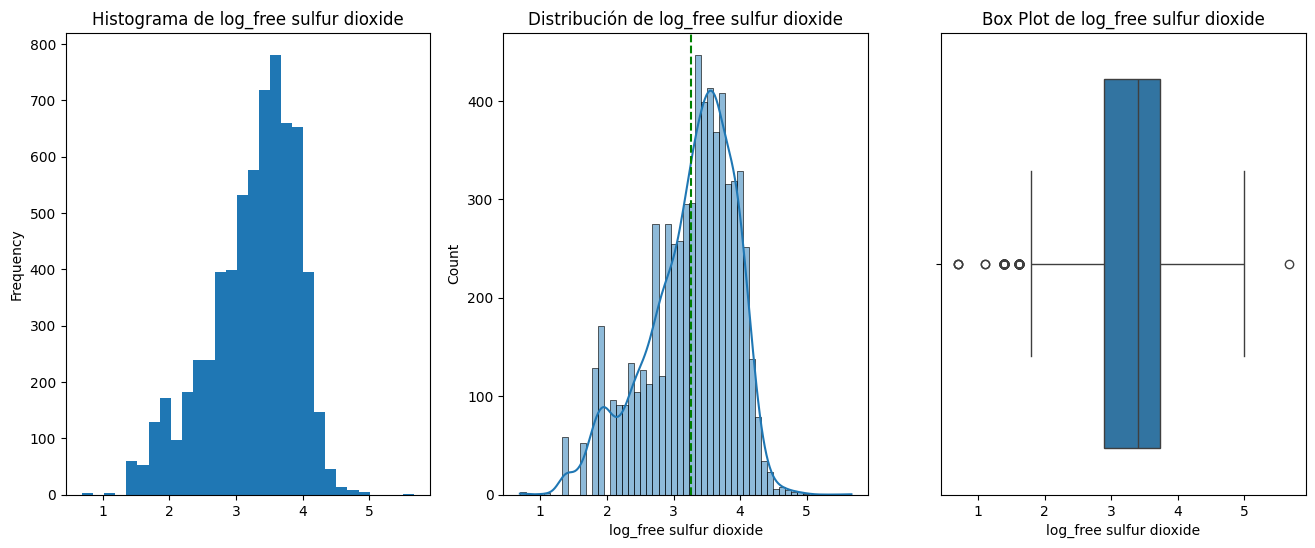

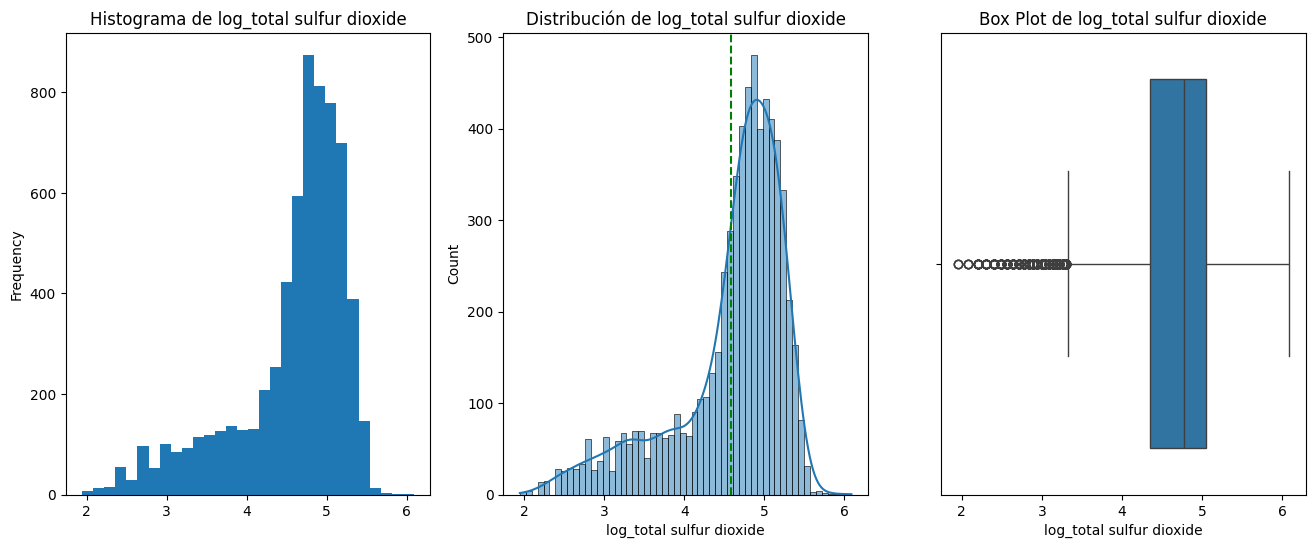

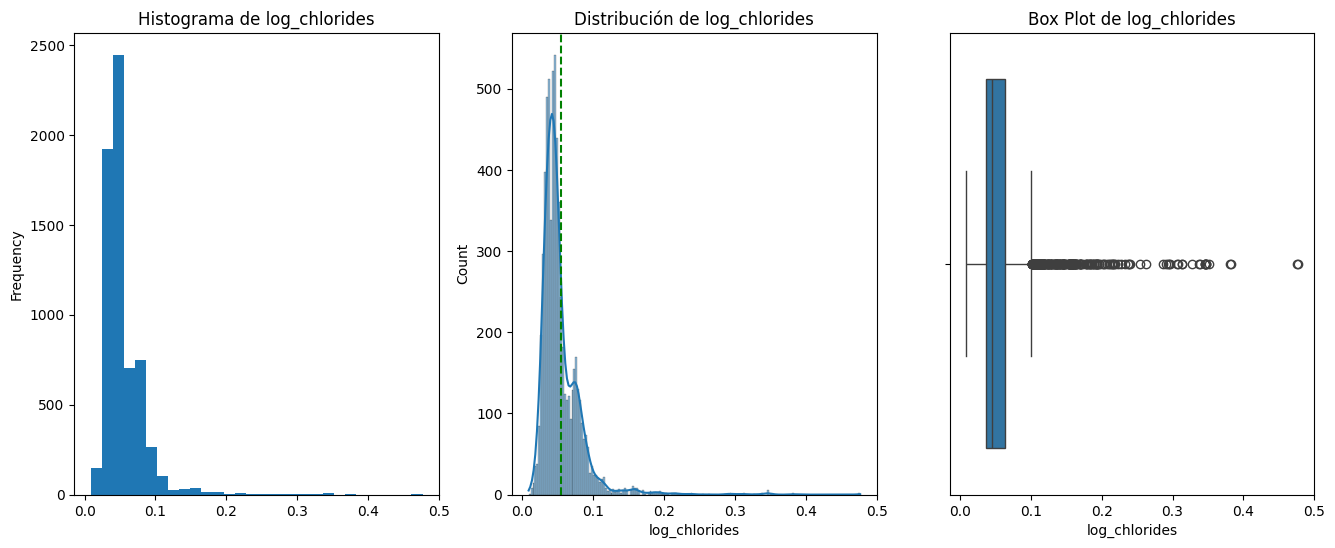

In [538]:
transformed_vars = ['residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'chlorides']
for var in transformed_vars:
    data[f'log_{var}'] = np.log1p(data[var])
    data.drop(var, axis=1, inplace=True)

for var in transformed_vars:
    feat_plot(data, f'log_{var}')

Eliminamos las observaciones que resulten ser outliers tras la transformación logarítmica:

In [539]:
numeric_columns = data.select_dtypes(include=['float64']).columns
for col in numeric_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[col] = data[col].clip(lower=lower_bound, upper=upper_bound)

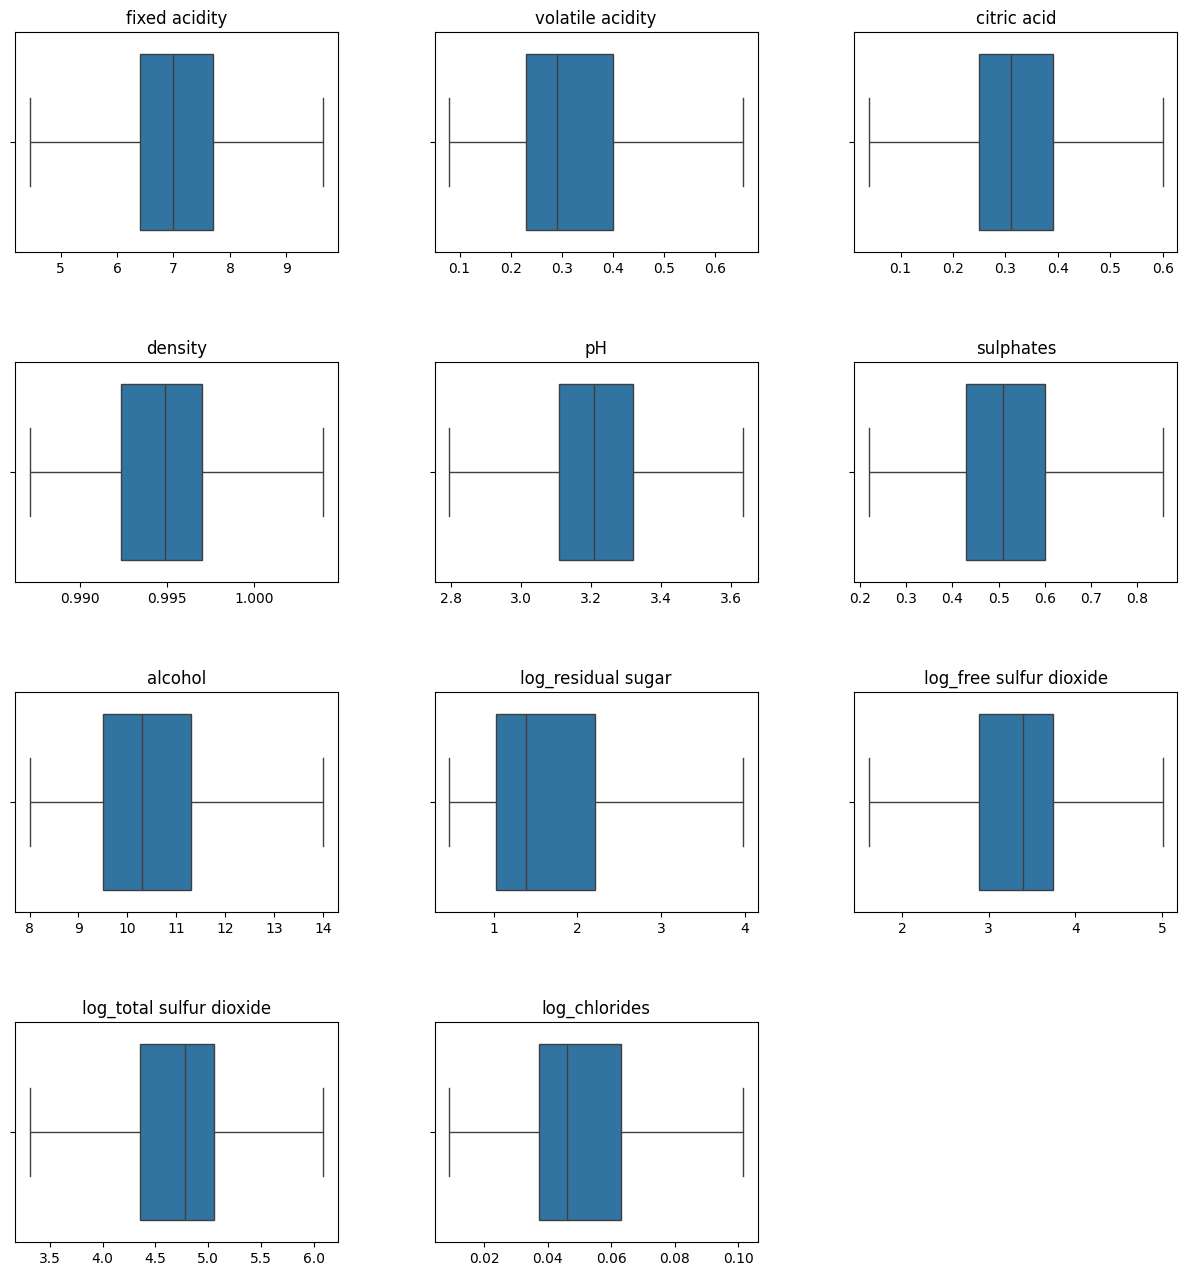

In [540]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 20))
fig.subplots_adjust(hspace=0.5, wspace=0.3)
axes = axes.ravel()

numeric_columns = data.select_dtypes(include=['float64']).columns

for i, col in enumerate(numeric_columns):
    sns.boxplot(x=data[col], ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')

for j in range(i+1, 15):
    fig.delaxes(axes[j])

plt.show()

Ponemos todas las observaciones de las variables categóricas en la escala de máximos-mínimos para preservar sus distancias relativas y mejorar la convergencia del algoritmo:

In [541]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])
data[numeric_columns].describe()

fixed acidity  volatile acidity  citric acid      density           pH  \
count    6497.000000       6497.000000  6497.000000  6497.000000  6497.000000   
mean        0.517726          0.439325     0.493178     0.449676     0.503141   
std         0.205015          0.251088     0.235457     0.174542     0.187977   
min         0.000000          0.000000     0.000000     0.000000     0.000000   
25%         0.375000          0.260870     0.375000     0.310294     0.375000   
50%         0.490385          0.365217     0.482143     0.461584     0.494048   
75%         0.625000          0.556522     0.625000     0.586176     0.625000   
max         1.000000          1.000000     1.000000     1.000000     1.000000   

         sulphates      alcohol  log_residual sugar  log_free sulfur dioxide  \
count  6497.000000  6497.000000         6497.000000              6497.000000   
mean      0.482940     0.415271            0.328185                 0.486988   
std       0.206608     0.198689            0.194517                 0.191008   
min       0.000000     0.000000            0.000000                 0.000000   
25%       0.330709     0.250000            0.159605                 0.375000   
50%       0.456693     0.383333            0.261330                 0.525722   
75%       0.598425     0.550000            0.495763                 0.625000   
max       1.000000     1.000000            1.000000                 1.000000   

       log_total sulfur dioxide  log_chlorides  
count               6497.000000    6497.000000  
mean                   0.470151       0.462012  
std                    0.218433       0.217852  
min                    0.000000       0.000000  
25%                    0.377225       0.306224  
50%                    0.529083       0.399522  
75%                    0.628709       0.583735  
max                    1.000000       1.000000

In [542]:
data.head()

fixed acidity  volatile acidity   citric acid   density        pH  \
0       0.567308          1.000000  0.000000e+00  0.634233  0.851190   
1       0.644231          1.000000  0.000000e+00  0.574904  0.482143   
2       0.644231          1.000000  4.163336e-17  0.586770  0.553571   
3       1.000000          0.347826  9.285714e-01  0.646099  0.434524   
4       0.567308          1.000000  0.000000e+00  0.634233  0.851190   

   sulphates wine type   alcohol  quality_bad  quality_good  quality_normal  \
0   0.535433         1  0.233333         True         False           False   
1   0.724409         1  0.300000         True         False           False   
2   0.677165         1  0.300000         True         False           False   
3   0.566929         1  0.300000        False         False            True   
4   0.535433         1  0.233333         True         False           False   

   log_residual sugar  log_free sulfur dioxide  log_total sulfur dioxide  \
0            0.169613                 0.255365                  0.089136   
1            0.231281                 0.483499                  0.327901   
2            0.206465                 0.340247                  0.251625   
3            0.169613                 0.375000                  0.288848   
4            0.169613                 0.255365                  0.089136   

   log_chlorides  
0       0.694783  
1       0.913513  
2       0.854297  
3       0.684734  
4       0.694783

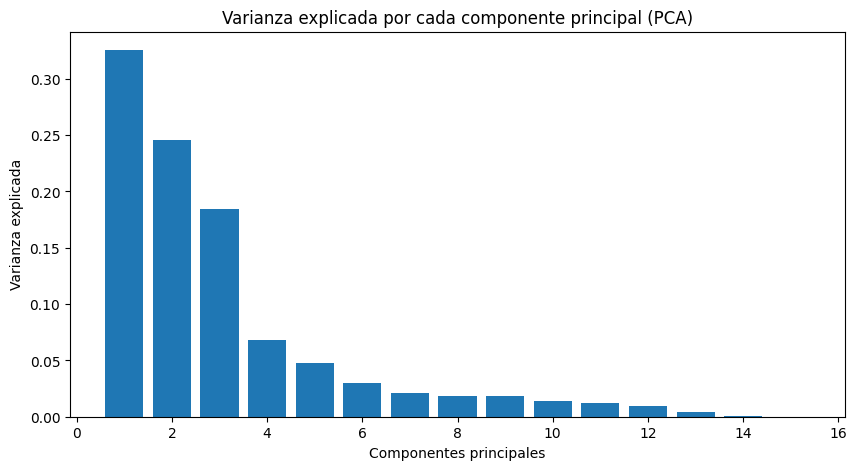

array([3.25523937e-01, 2.46112317e-01, 1.84514893e-01, 6.79673067e-02,
       4.75255334e-02, 2.99792829e-02, 2.11539073e-02, 1.81431819e-02,
       1.80446689e-02, 1.42025200e-02, 1.20028652e-02, 9.40381768e-03,
       4.49297006e-03, 9.32799401e-04, 5.72905211e-32])

In [543]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(data)
explained_variance = pca.explained_variance_ratio_

# Visualizar la varianza explicada por cada componente principal
plt.figure(figsize=(10, 5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance)
plt.ylabel('Varianza explicada')
plt.xlabel('Componentes principales')
plt.title('Varianza explicada por cada componente principal (PCA)')
plt.show()

explained_variance

Los tres primeros componentes principales son capaces de explicar en torno al 70% del dataset, por tanto, vamos a emplear dichos componentes para reducir la dimensionalidad.

#### 2- Ejecutar diferentes procesos de agrupamiento utilizando el algoritmo K-Means e identificar cual es el valor de k que mejor resultados ofrece (1 punto).
En necesario justificar la selección del mejor valor de k mediante la utilización de datos empíricos. 

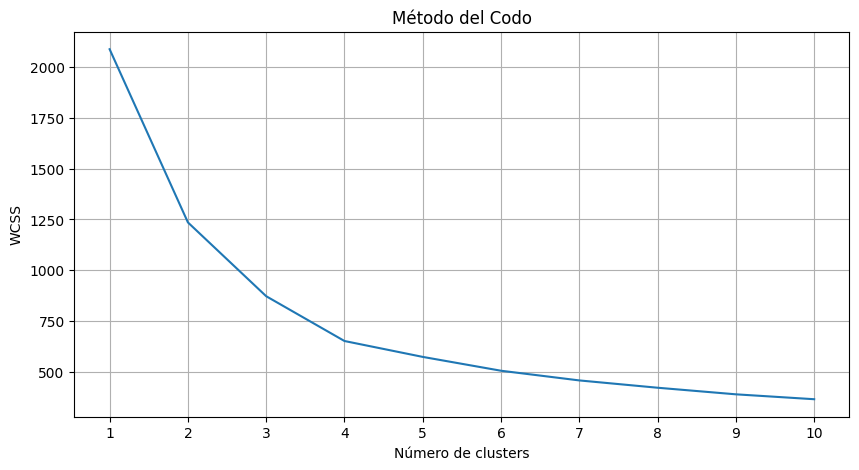

In [544]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

pca_3d = PCA(n_components=3)
principal_components = pca_3d.fit_transform(data[numeric_columns])

wcss = []
for i in range(1, 11):  # Evaluar de 1 a 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(principal_components)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss)
plt.title('Método del Codo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS') 
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

Parece ser que el número óptimo de clusteres serían 3 debido al cambio drástico de la pendiente.

#### 3- Analiza los clústeres obtenidos para el mejor valor de k y responde a las siguientes preguntas:  
• ¿Existe algún tipo de similitud entre los grupos obtenidos y los valores de la variable quality del 
dataset? (0.5 puntos).  
• ¿Cómo se diferencian los clústeres entre sí? (0.5 puntos). 
En necesario justificar las respuestas mediante la utilización de datos empíricos.

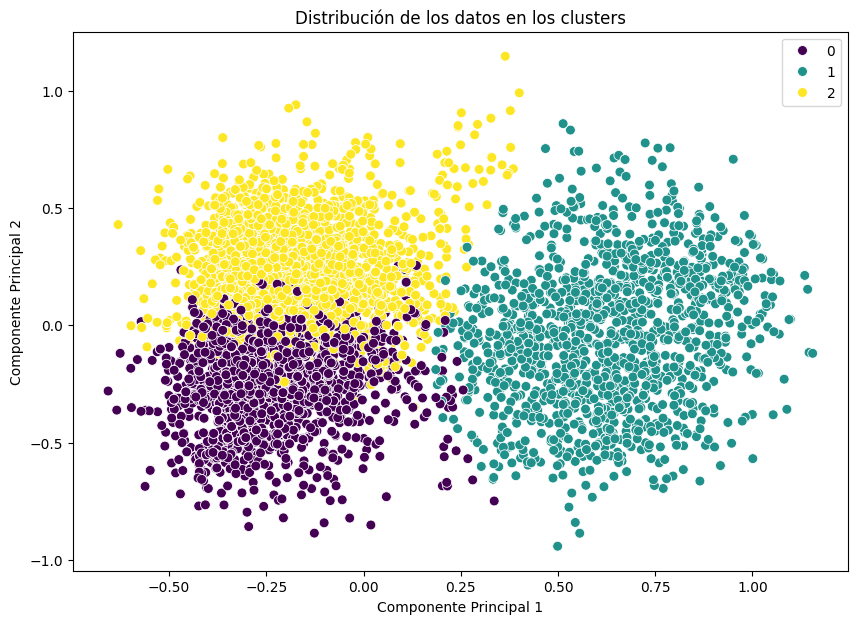

In [545]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(principal_components)

plt.figure(figsize=(10, 7))
sns.scatterplot(x=principal_components[:, 0], y=principal_components[:, 1], hue=clusters, palette='viridis', s=50)
plt.title('Distribución de los datos en los clusters')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

In [546]:
data['cluster'] = kmeans.labels_
quality_columns = [col for col in data.columns if 'quality' in col]
quality_summary = data.groupby('cluster')[quality_columns].sum()
cluster_sizes = data['cluster'].value_counts().sort_index()
quality_proportions = quality_summary.div(cluster_sizes, axis=0)

# Calcular el resumen numérico y unirlo con las proporciones de calidad
numeric_summary = data.select_dtypes(include=[np.number]).groupby('cluster').mean()
cluster_summary = numeric_summary.join(quality_proportions)

# Mostrar el resumen extendido
print(cluster_summary)

         fixed acidity  volatile acidity  citric acid   density        pH  \
cluster                                                                     
0             0.489135          0.347337     0.547925  0.561092  0.432410   
1             0.694151          0.743772     0.411609  0.573605  0.603216   
2             0.435997          0.334165     0.496035  0.281663  0.502632   

         sulphates   alcohol  log_residual sugar  log_free sulfur dioxide  \
cluster                                                                     
0         0.427898  0.265399            0.523931                 0.614510   
1         0.657041  0.391534            0.214593                 0.297628   
2         0.424854  0.555558            0.231647                 0.493259   

         log_total sulfur dioxide  log_chlorides  quality_bad  quality_good  \
cluster                                                                       
0                        0.637181       0.438364     0.460473      0.0

0. Cluster 0:

- Características químicas: Este cluster tiene niveles moderados de acidez fija, acidez volátil, y citricidad. La cantidad de azúcar residual es alta, así como la densidad y los sulfatos.
- Proporciones de calidad: La mayoría de los vinos en este cluster son calificados como normales (44%), seguidos por los vinos malos (46%) y una menor proporción de buenos (10%). Este cluster podría representar vinos con características balanceadas pero no excepcionales.

1. Cluster 1:
- Características químicas: Este cluster se caracteriza por tener la mayor acidez volátil y los niveles más altos de cloruros, lo que podría indicar vinos más robustos o con posibles defectos. La cantidad de azúcar residual es baja y los niveles de dióxido de azufre son significativamente menores.

- Proporciones de calidad: Predomina una cantidad similar de vinos normales (39%) y malos (48.4%), con una pequeña cantidad de buenos (12.6%). Esto sugiere que este cluster 
incluye vinos de peor calidad.

2. Cluster 2:
- Características químicas: Presenta los niveles más bajos de cloruros y una densidad relativamente baja comparada con los otros clusters. Los niveles de ácido cítrico son también moderados, pero mejores que en el cluster 1.

- Proporciones de calidad: Este cluster tiene una mayor diversidad en las calificaciones, con una representación más equilibrada de vinos normales (46.2%) y buenos (32%), y la menor proporción de vinos malos (21.7%). Este cluster podría representar vinos de calidad decente, con una mayor propensión hacia características más deseables.

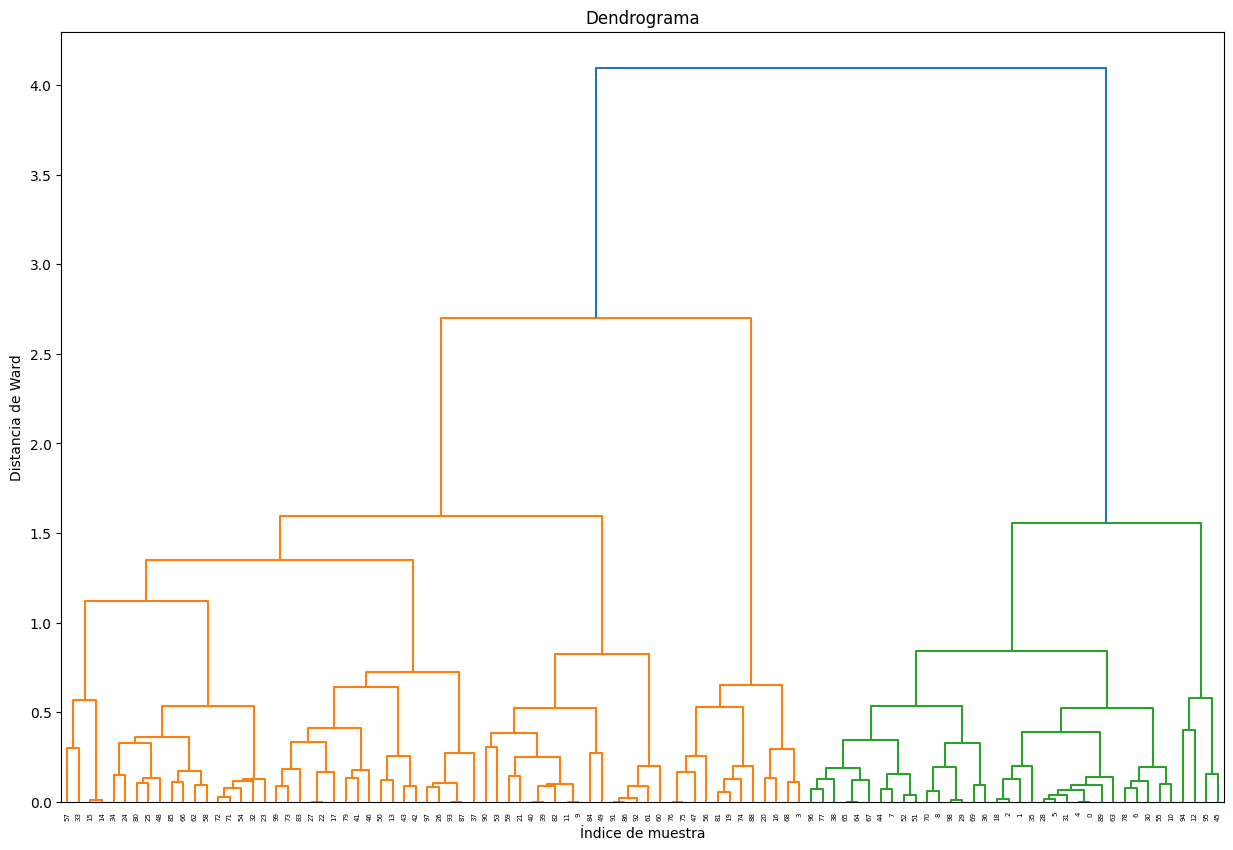

In [547]:
from scipy.cluster.hierarchy import dendrogram, linkage
sample_data = principal_components[:100]  # Reducir el tamaño de los datos para el dendrograma
linked_sample = linkage(sample_data, method='ward')

# Crear el dendrograma para la muestra reducida
plt.figure(figsize=(15, 10))
dendrogram(linked_sample, 
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrograma')
plt.xlabel('Índice de muestra')
plt.ylabel('Distancia de Ward')
plt.show()

In [548]:
data.head()

fixed acidity  volatile acidity   citric acid   density        pH  \
0       0.567308          1.000000  0.000000e+00  0.634233  0.851190   
1       0.644231          1.000000  0.000000e+00  0.574904  0.482143   
2       0.644231          1.000000  4.163336e-17  0.586770  0.553571   
3       1.000000          0.347826  9.285714e-01  0.646099  0.434524   
4       0.567308          1.000000  0.000000e+00  0.634233  0.851190   

   sulphates wine type   alcohol  quality_bad  quality_good  quality_normal  \
0   0.535433         1  0.233333         True         False           False   
1   0.724409         1  0.300000         True         False           False   
2   0.677165         1  0.300000         True         False           False   
3   0.566929         1  0.300000        False         False            True   
4   0.535433         1  0.233333         True         False           False   

   log_residual sugar  log_free sulfur dioxide  log_total sulfur dioxide  \
0            0.169613                 0.255365                  0.089136   
1            0.231281                 0.483499                  0.327901   
2            0.206465                 0.340247                  0.251625   
3            0.169613                 0.375000                  0.288848   
4            0.169613                 0.255365                  0.089136   

   log_chlorides  cluster  
0       0.694783        1  
1       0.913513        1  
2       0.854297        1  
3       0.684734        1  
4       0.694783        1

### Ejercicio 4 (Agrupamiento)

##### Objetivo (2 puntos)  

La  empresa  productora  de  vinos  desea  mejorar  el  proceso  de  producción  de  sus  vinos  con  el  objetivo  de 
mejorar las futuras producciones.  
Para ello han pensado en utilizar un algoritmo de agrupamiento jerárquico para segmentar los diferentes vinos 
en base a sus componentes, calidad y nivel de alcohol.

Dado el mejor valor de k del apartado anterior selecciona los 10 ejemplos más representativos de cada 
clúster para generar un nuevo dataset y aplicar agrupamiento jerárquico y responder a las siguientes 
preguntas:  

• ¿Cuál ha sido tu criterio para seleccionar los ejemplos más representativos de cada clúster? (0,5 
puntos). 

Para este ejercicio vamos a utilizar distancia gower que calcula distancia manhattan para variables numericas y variables categoricas distancia hamming

In [ ]:
from scipy.cluster.hierarchy import linkage, fcluster
from gower.gower_dist import gower_matrix
import matplotlib.pyplot as plt
from scipy.spatial.distance import squareform

gower_mat = gower_matrix(df)
linkage_matrix = linkage(squareform(gower_mat), method='average')  # Puedes elegir otro método de linkage

# Determina el número de clusters
k = 2  # Puedes elegir otro número de clusters
clusters = fcluster(linkage_matrix, t=k, criterion='maxclust')

df['Cluster'] = clusters

df.head()

fixed acidity  volatile acidity  citric acid   density        pH  \
id                                                                     
0        0.241935          2.232780    -2.095225  1.057179  1.851485   
1        0.617119          2.232780    -2.095225  0.717200 -0.111850   
2        0.617119          2.232780    -2.095225  0.785196  0.268150   
3        2.352347         -0.364645     1.850979  1.125175 -0.365183   
4        0.241935          2.232780    -2.095225  1.057179  1.851485   

    sulphates   quality  wine type   alcohol  log_residual sugar  \
id                                                                 
0    0.253977 -1.134561  -1.749832 -0.915542           -0.815268   
1    1.168611 -1.134561  -1.749832 -0.579859           -0.498248   
2    0.939952 -1.134561  -1.749832 -0.579859           -0.625821   
3    0.406416  0.233103  -1.749832 -0.579859           -0.815268   
4    0.253977 -1.134561  -1.749832 -0.915542           -0.815268   

    log_free sulfur dioxide  log_total sulfur dioxide  log_chlorides  Cluster  
id                                                                             
0                 -1.212429                 -1.744298       1.068280        1  
1                 -0.018033                 -0.651033       2.072460        1  
2                 -0.768028                 -1.000291       1.800602        1  
3                 -0.586081                 -0.829854       1.022149        1  
4                 -1.212429                 -1.744298       1.068280        1

3) Generar y analizar el dendrograma resultante del proceso de agrupamiento. (0,75 puntos)

Con scikit-learn se muestran los res

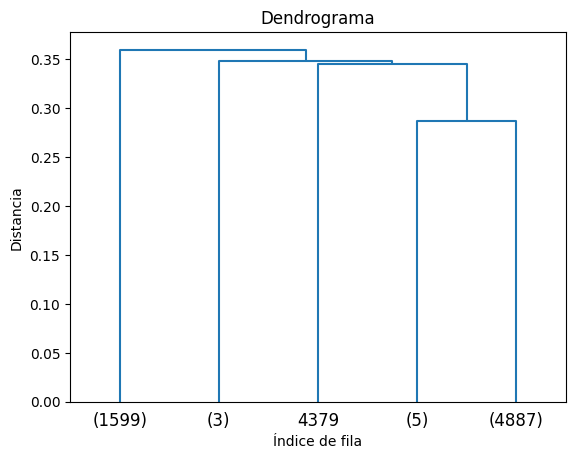

In [ ]:
from scipy.cluster.hierarchy import dendrogram

dendrogram(linkage_matrix, p=5, truncate_mode='lastp', show_leaf_counts=True)
plt.title("Dendrograma")
plt.xlabel("Índice de fila")
plt.ylabel("Distancia")
plt.show()